## <div style="text-align: center">Credit Card Fraud Detection</div> 
### <div style="text-align: center">Part 1</div> 

<div style="text-align: center; font-size: 120%"> 12/08/2020</div>


## Comparison of supervised and unsupervised learning algorithms in credit card fraud detection

### Motivation and problem statement
Anomaly detection (a subfield of which is also known as outlier detection) refers to a data analysis technique that aims to find the very rare observations that are different from the normal or the vast majority of the observations. This method is widely used in different scientific areas, for example: in healthcare identifying abnormal cells to aid establishing a diagnosis, in cybersecurity identifying network or server attacks/breaches, in finance for identifying high risk operational events such as fraudulent credit card transactions. The general characteristic of anomalous activity is that it occurs with a very low probability but might be of very high negative impact and thus can cause substantial cost and/or liability for organizations and stakeholders involved. Inspired by this, in our project we will attempt to identify fraudulent credit card transactions.

### Data Source
For our project we will use the Credit Card Fraud dataset available on Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud. The dataset consists of 284,807 credit card transactions occurred in the span of two days in September 2013 initiated by European cardholder customers of an unnamed bank/credit card processor. The dataset is extremely imbalanced, contains only 472 transactions labeled as fraud, which is a mere 0.172% of all the observations. The data set contains 30 numerical variables: the ‘Time’ and the ‘Amount’ of transactions and additional 28 numerical features (‘V1’, ‘V2’, ... ‘V28’) which are the result of a PCA transformation. The ‘Time’ variable describes the elapsed time in seconds between each transaction and the first transaction in the dataset. The labels are represented in the ‘Class’ response variable, which equals to ‘1’ in case of fraudulent transactions otherwise it is ‘0’. Due to confidentiality issues the cardholder didn’t provide the original features. Although the dataset can be considered as ‘ready for use’ and we do not have to handle correlation within the features, it also limits the analysts options for feature engineering to just keeping or dropping certain variables.

...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_validate as CV
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option("display.float", "{:.2f}".format)
df = pd.read_csv('data/creditcard.csv')
df.describe()

Time        V1        V2        V3        V4        V5        V6  \
count 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00   
mean   94813.86      0.00      0.00     -0.00      0.00     -0.00      0.00   
std    47488.15      1.96      1.65      1.52      1.42      1.38      1.33   
min        0.00    -56.41    -72.72    -48.33     -5.68   -113.74    -26.16   
25%    54201.50     -0.92     -0.60     -0.89     -0.85     -0.69     -0.77   
50%    84692.00      0.02      0.07      0.18     -0.02     -0.05     -0.27   
75%   139320.50      1.32      0.80      1.03      0.74      0.61      0.40   
max   172792.00      2.45     22.06      9.38     16.88     34.80     73.30   

             V7        V8        V9  ...       V21       V22       V23  \
count 284807.00 284807.00 284807.00  ... 284807.00 284807.00 284807.00   
mean      -0.00     -0.00     -0.00  ...      0.00      0.00      0.00   
std        1.24      1.19      1.10  ...      0.73      0.73      0.62   
min      -43.56    -73.22    -13.43  ...    -34.83    -10.93    -44.81   
25%       -0.55     -0.21     -0.64  ...     -0.23     -0.54     -0.16   
50%        0.04      0.02     -0.05  ...     -0.03      0.01     -0.01   
75%        0.57      0.33      0.60  ...      0.19      0.53      0.15   
max      120.59     20.01     15.59  ...     27.20     10.50     22.53   

            V24       V25       V26       V27       V28    Amount     Class  
count 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00  
mean       0.00      0.00      0.00     -0.00     -0.00     88.35      0.00  
std        0.61      0.52      0.48      0.40      0.33    250.12      0.04  
min       -2.84    -10.30     -2.60    -22.57    -15.43      0.00      0.00  
25%       -0.35     -0.32     -0.33     -0.07     -0.05      5.60      0.00  
50%        0.04      0.02     -0.05      0.00      0.01     22.00      0.00  
75%        0.44      0.35      0.24      0.09      0.08     77.16      0.00  
max        4.58      7.52      3.52     31.61     33.85  25691.16      1.00  

[8 rows x 31 columns]

In [3]:
df.head()

Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V21   V22  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -0.02  0.28   
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -0.23 -0.64   
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  0.25  0.77   
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -0.11  0.01   
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -0.01  0.80   

    V23   V24   V25   V26   V27   V28  Amount  Class  
0 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62      0  
1  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69      0  
2  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66      0  
3 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50      0  
4 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99      0  

[5 rows x 31 columns]

In [4]:
m = df.shape[0]

print(f'Number of observations: {m:,}')
print(f'Number of frauds: {sum(df["Class"]==1)}')
print(f'Proportion of frauds: {sum(df["Class"]==1)/df.shape[0]:.3%}')

Number of observations: 284,807
Number of frauds: 492
Proportion of frauds: 0.173%


### My helper functions

In [5]:
def disp_conf_matrix(true, pred):
    df = pd.DataFrame(confusion_matrix(true, pred), columns=['Pred_0', 'Pred_1'], index=['True_0', 'True_1'])
    display(df)

## 1. Exploratory analysis
### 1.1. Check missing values

In [6]:
df.isna().sum().sum()

0

There are no missing values in the dataset.

### 1.2. KDE estimation 

In [7]:
cols = df.columns.drop(['Time', 'Amount', 'Class'])

normal = df.loc[df['Class']==0]
fraud = df.loc[df['Class']==1]

colors = ['#b8e0ff', '#ffa1a1']

''

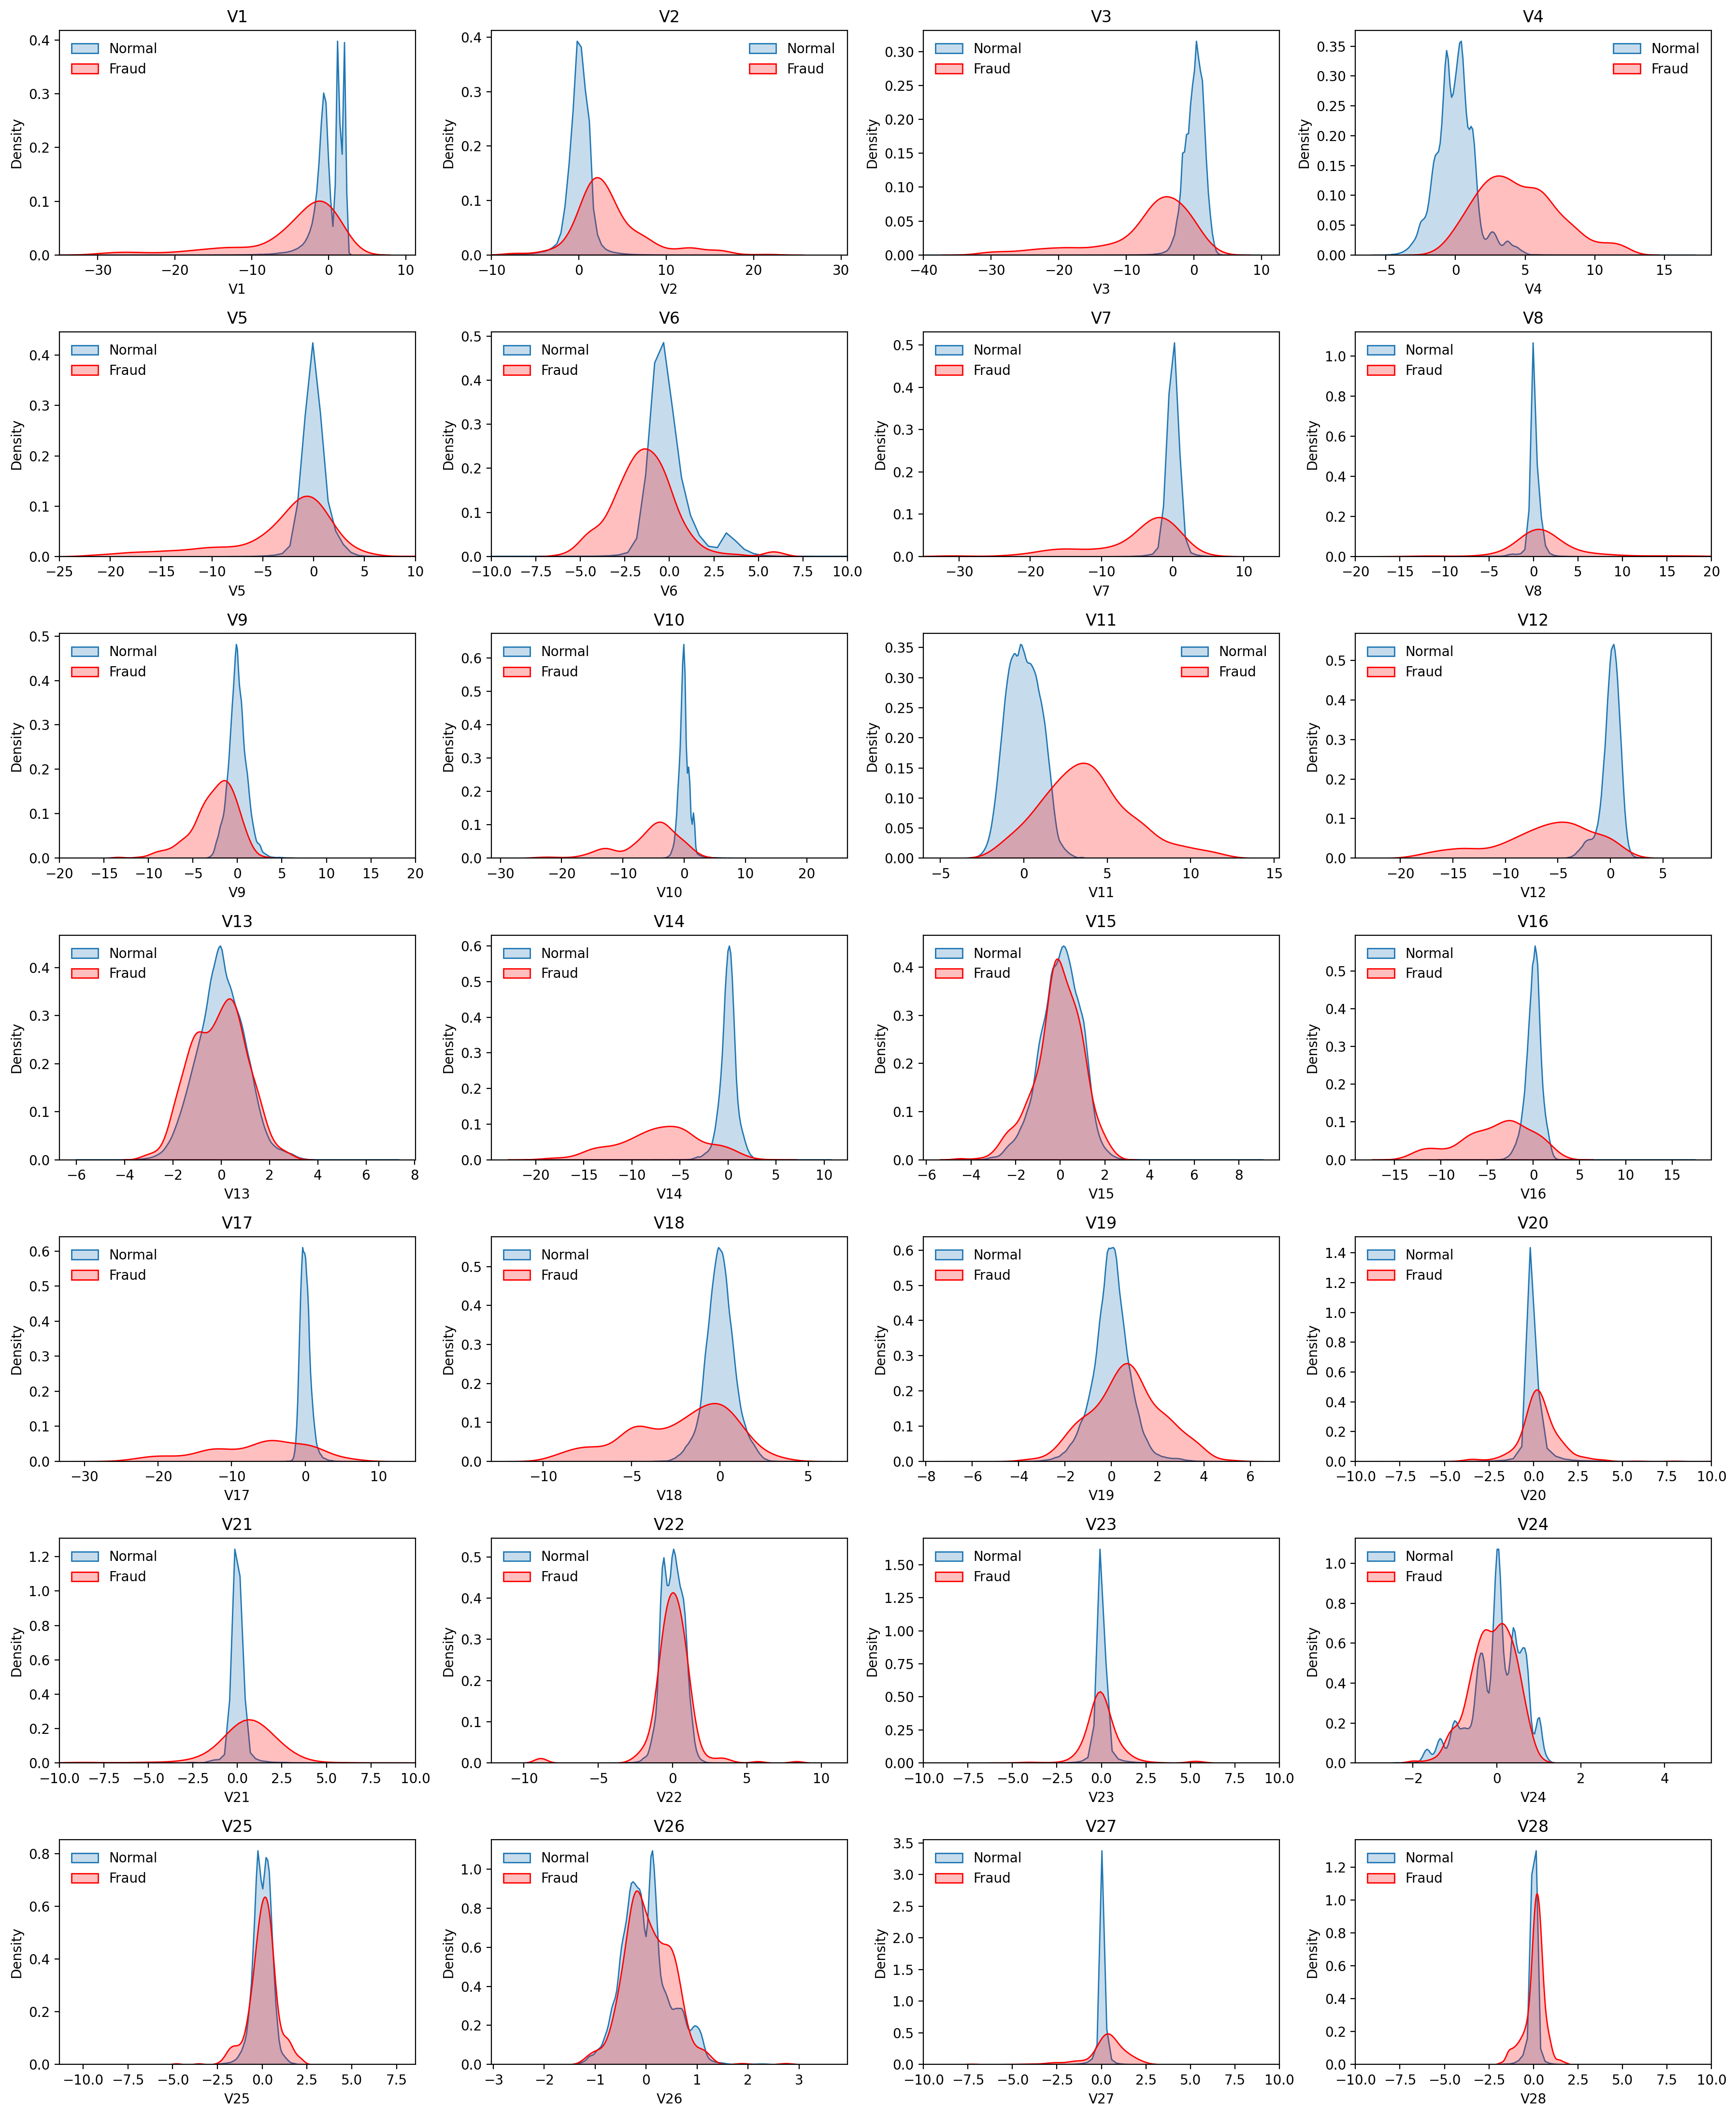

In [9]:
fig, axes = plt.subplots(nrows=7,ncols=4, figsize=(18, 22), dpi=200)

for i, ax in enumerate(axes.flatten()):
    col = cols[i]
    sns.kdeplot(normal[col], bw_method='scott', shade=True, label='Normal', ax=ax, linewidth=1)
    sns.kdeplot(fraud[col], bw_method='scott', shade=True, label='Fraud', color='r', ax=ax, linewidth=1)
    ax.set_title(col)
    ax.legend(frameon=False, loc='upper left')
    ax.set_xlabel('')
    
axes.flatten()[1].legend(frameon=False, loc='upper right')
axes.flatten()[3].legend(frameon=False, loc='upper right')
axes.flatten()[10].legend(frameon=False, loc='upper right')

axes.flatten()[0].set_xlim(left=-35)
axes.flatten()[1].set_xlim(left=-10)
axes.flatten()[2].set_xlim(left=-40)
axes.flatten()[4].set_xlim(left=-25, right=10)
axes.flatten()[5].set_xlim(left=-10, right=10)
axes.flatten()[6].set_xlim(left=-35, right=15)
axes.flatten()[7].set_xlim(left=-20, right=20)
axes.flatten()[8].set_xlim(left=-20, right=20)

axes.flatten()[19].set_xlim(left=-10, right=10)
axes.flatten()[20].set_xlim(left=-10, right=10)
axes.flatten()[22].set_xlim(left=-10, right=10)
axes.flatten()[26].set_xlim(left=-10, right=10)
axes.flatten()[27].set_xlim(left=-10, right=10)



plt.tight_layout()
# plt.savefig('img/kde_plots.png', dpi=200)
;


### 1.3. Distribution of the amount

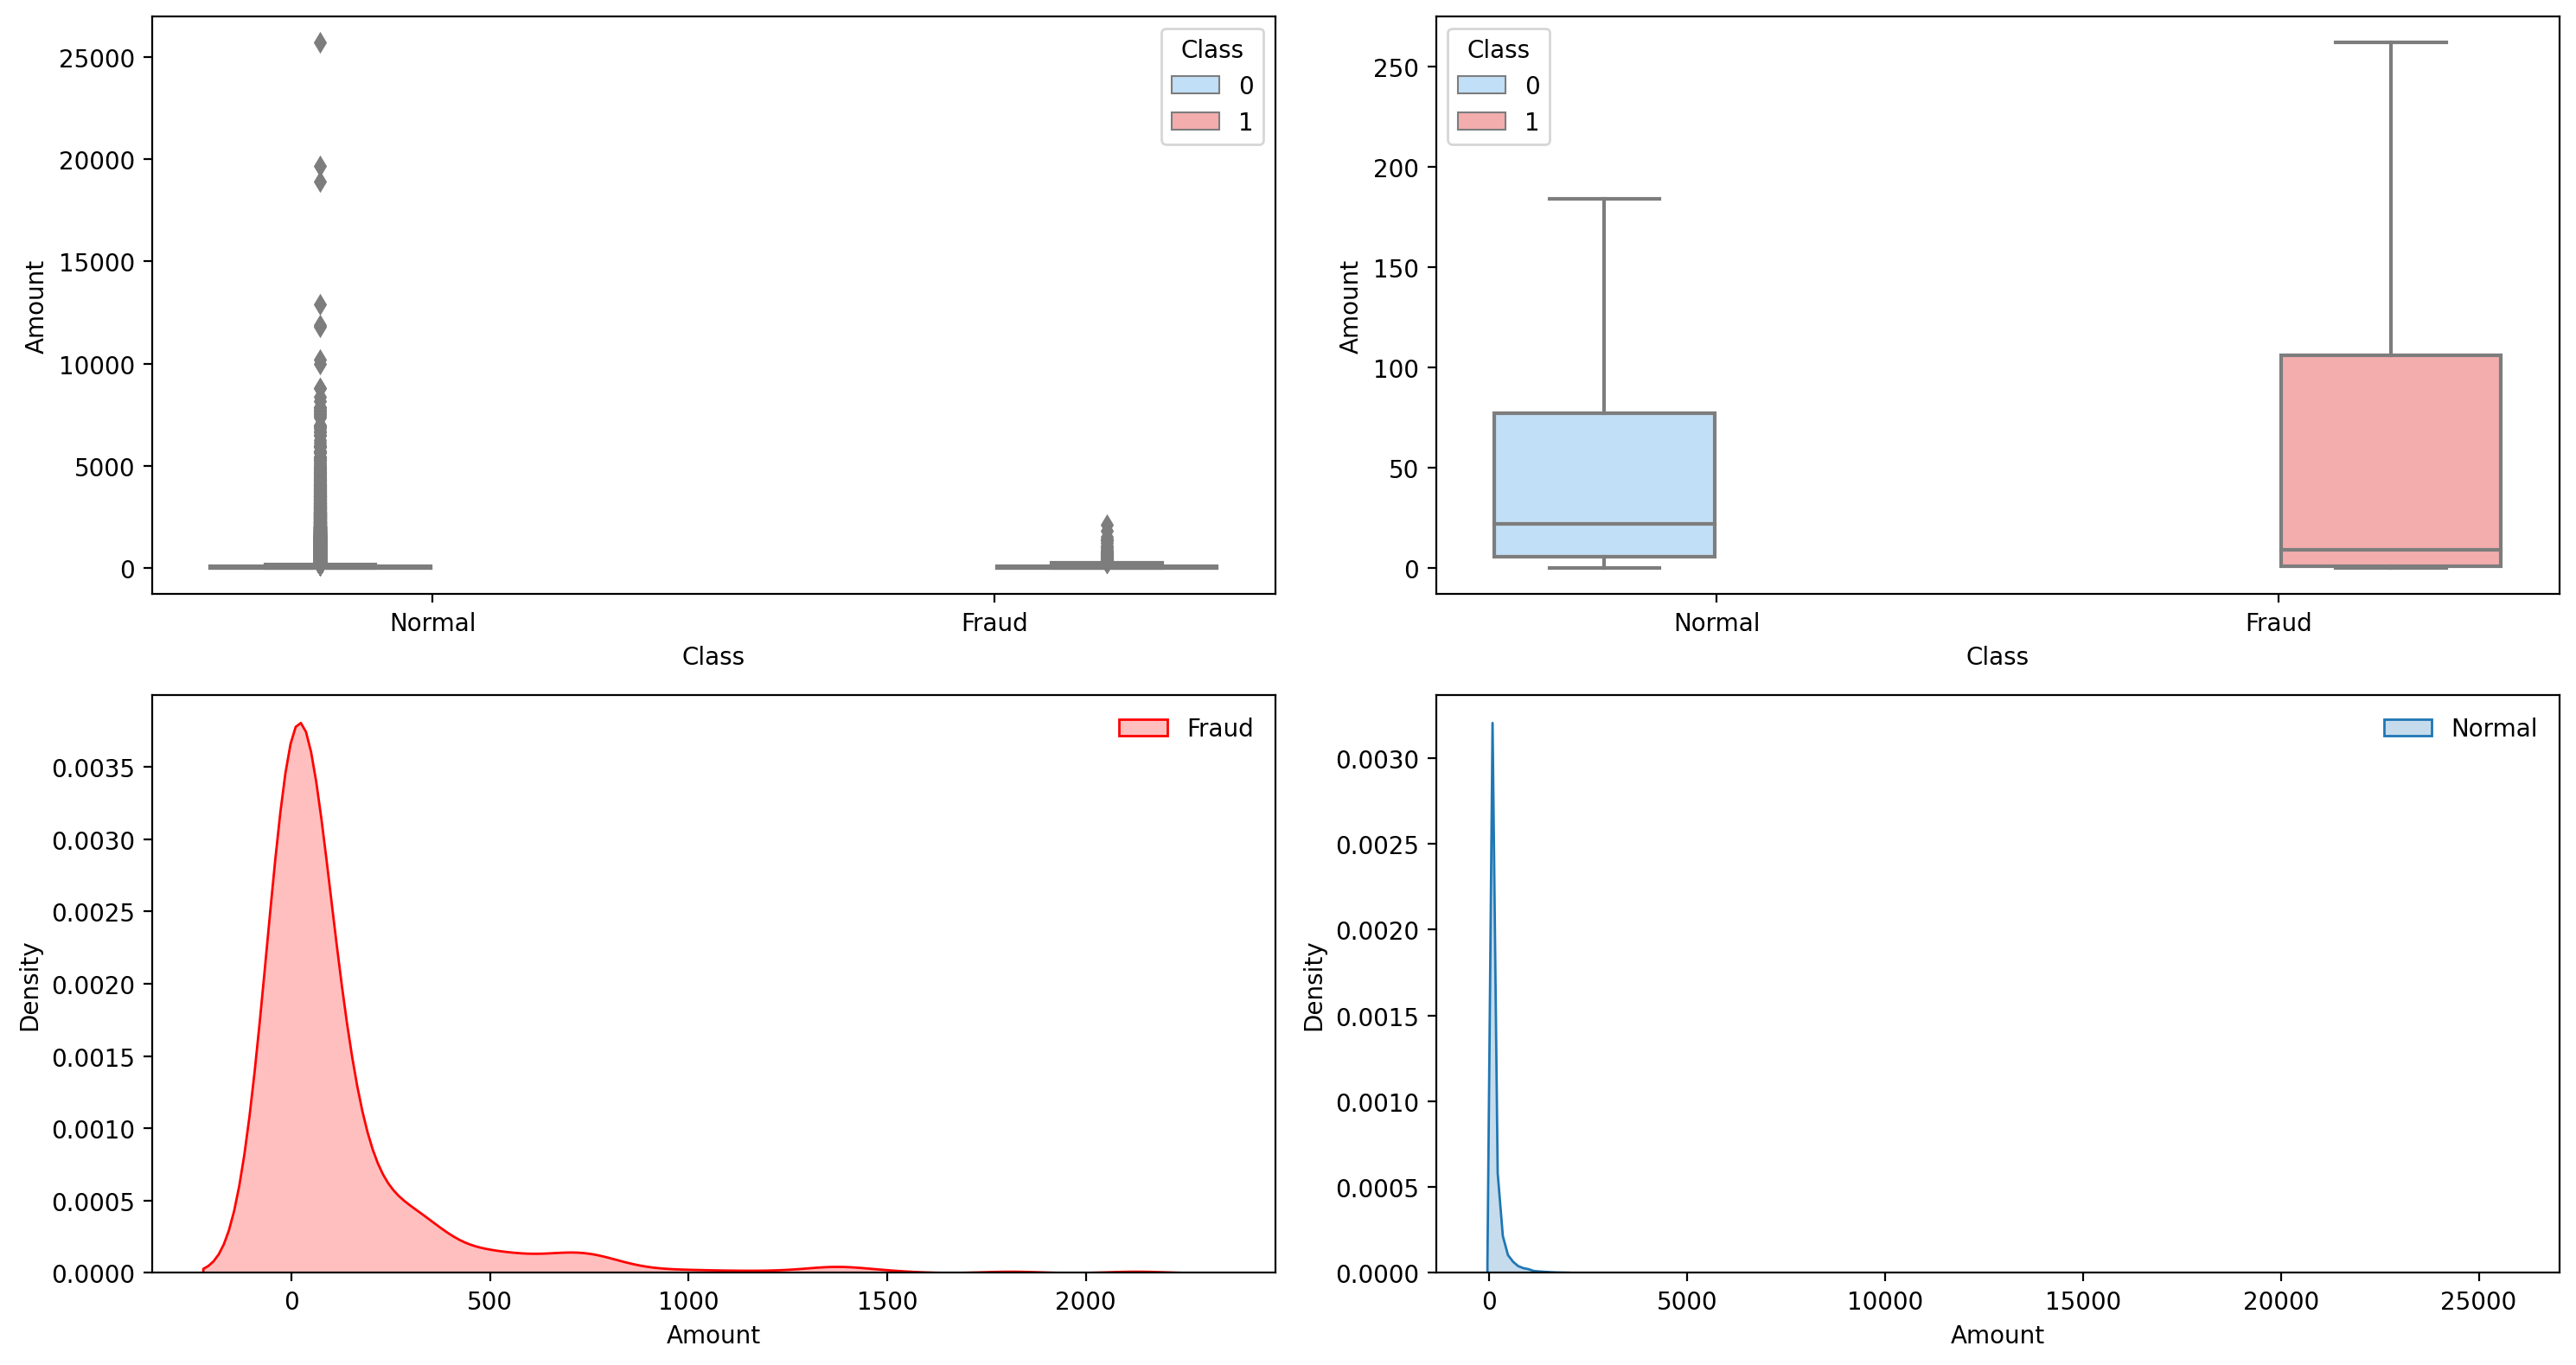

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2, figsize=(15,8), dpi=200)

sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class", data=df, palette=colors, showfliers=True)
sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class", data=df, palette=colors, showfliers=False)

sns.kdeplot(fraud['Amount'], shade=True, label='Fraud', color='r', ax=ax3)
sns.kdeplot(normal['Amount'], shade=True, label='Normal', ax=ax4)

ax1.set_xticklabels(['Normal', 'Fraud'])
ax2.set_xticklabels(['Normal', 'Fraud'])
# ax3.set_xlim(left=-20, right=2500)
# ax3.set_ylim(top=0.003)
ax3.legend(frameon=False)
ax4.legend(frameon=False)

plt.tight_layout()
# plt.savefig('img/amount_dist.png', dpi=200)
plt.show();

In [11]:
sum(fraud['Amount'] > 20000) / len(fraud)

0.0

In [12]:
sum(normal['Amount'] > 20000) / len(normal)

3.51722561243691e-06

### 1.4. Distribution of the fraud in time

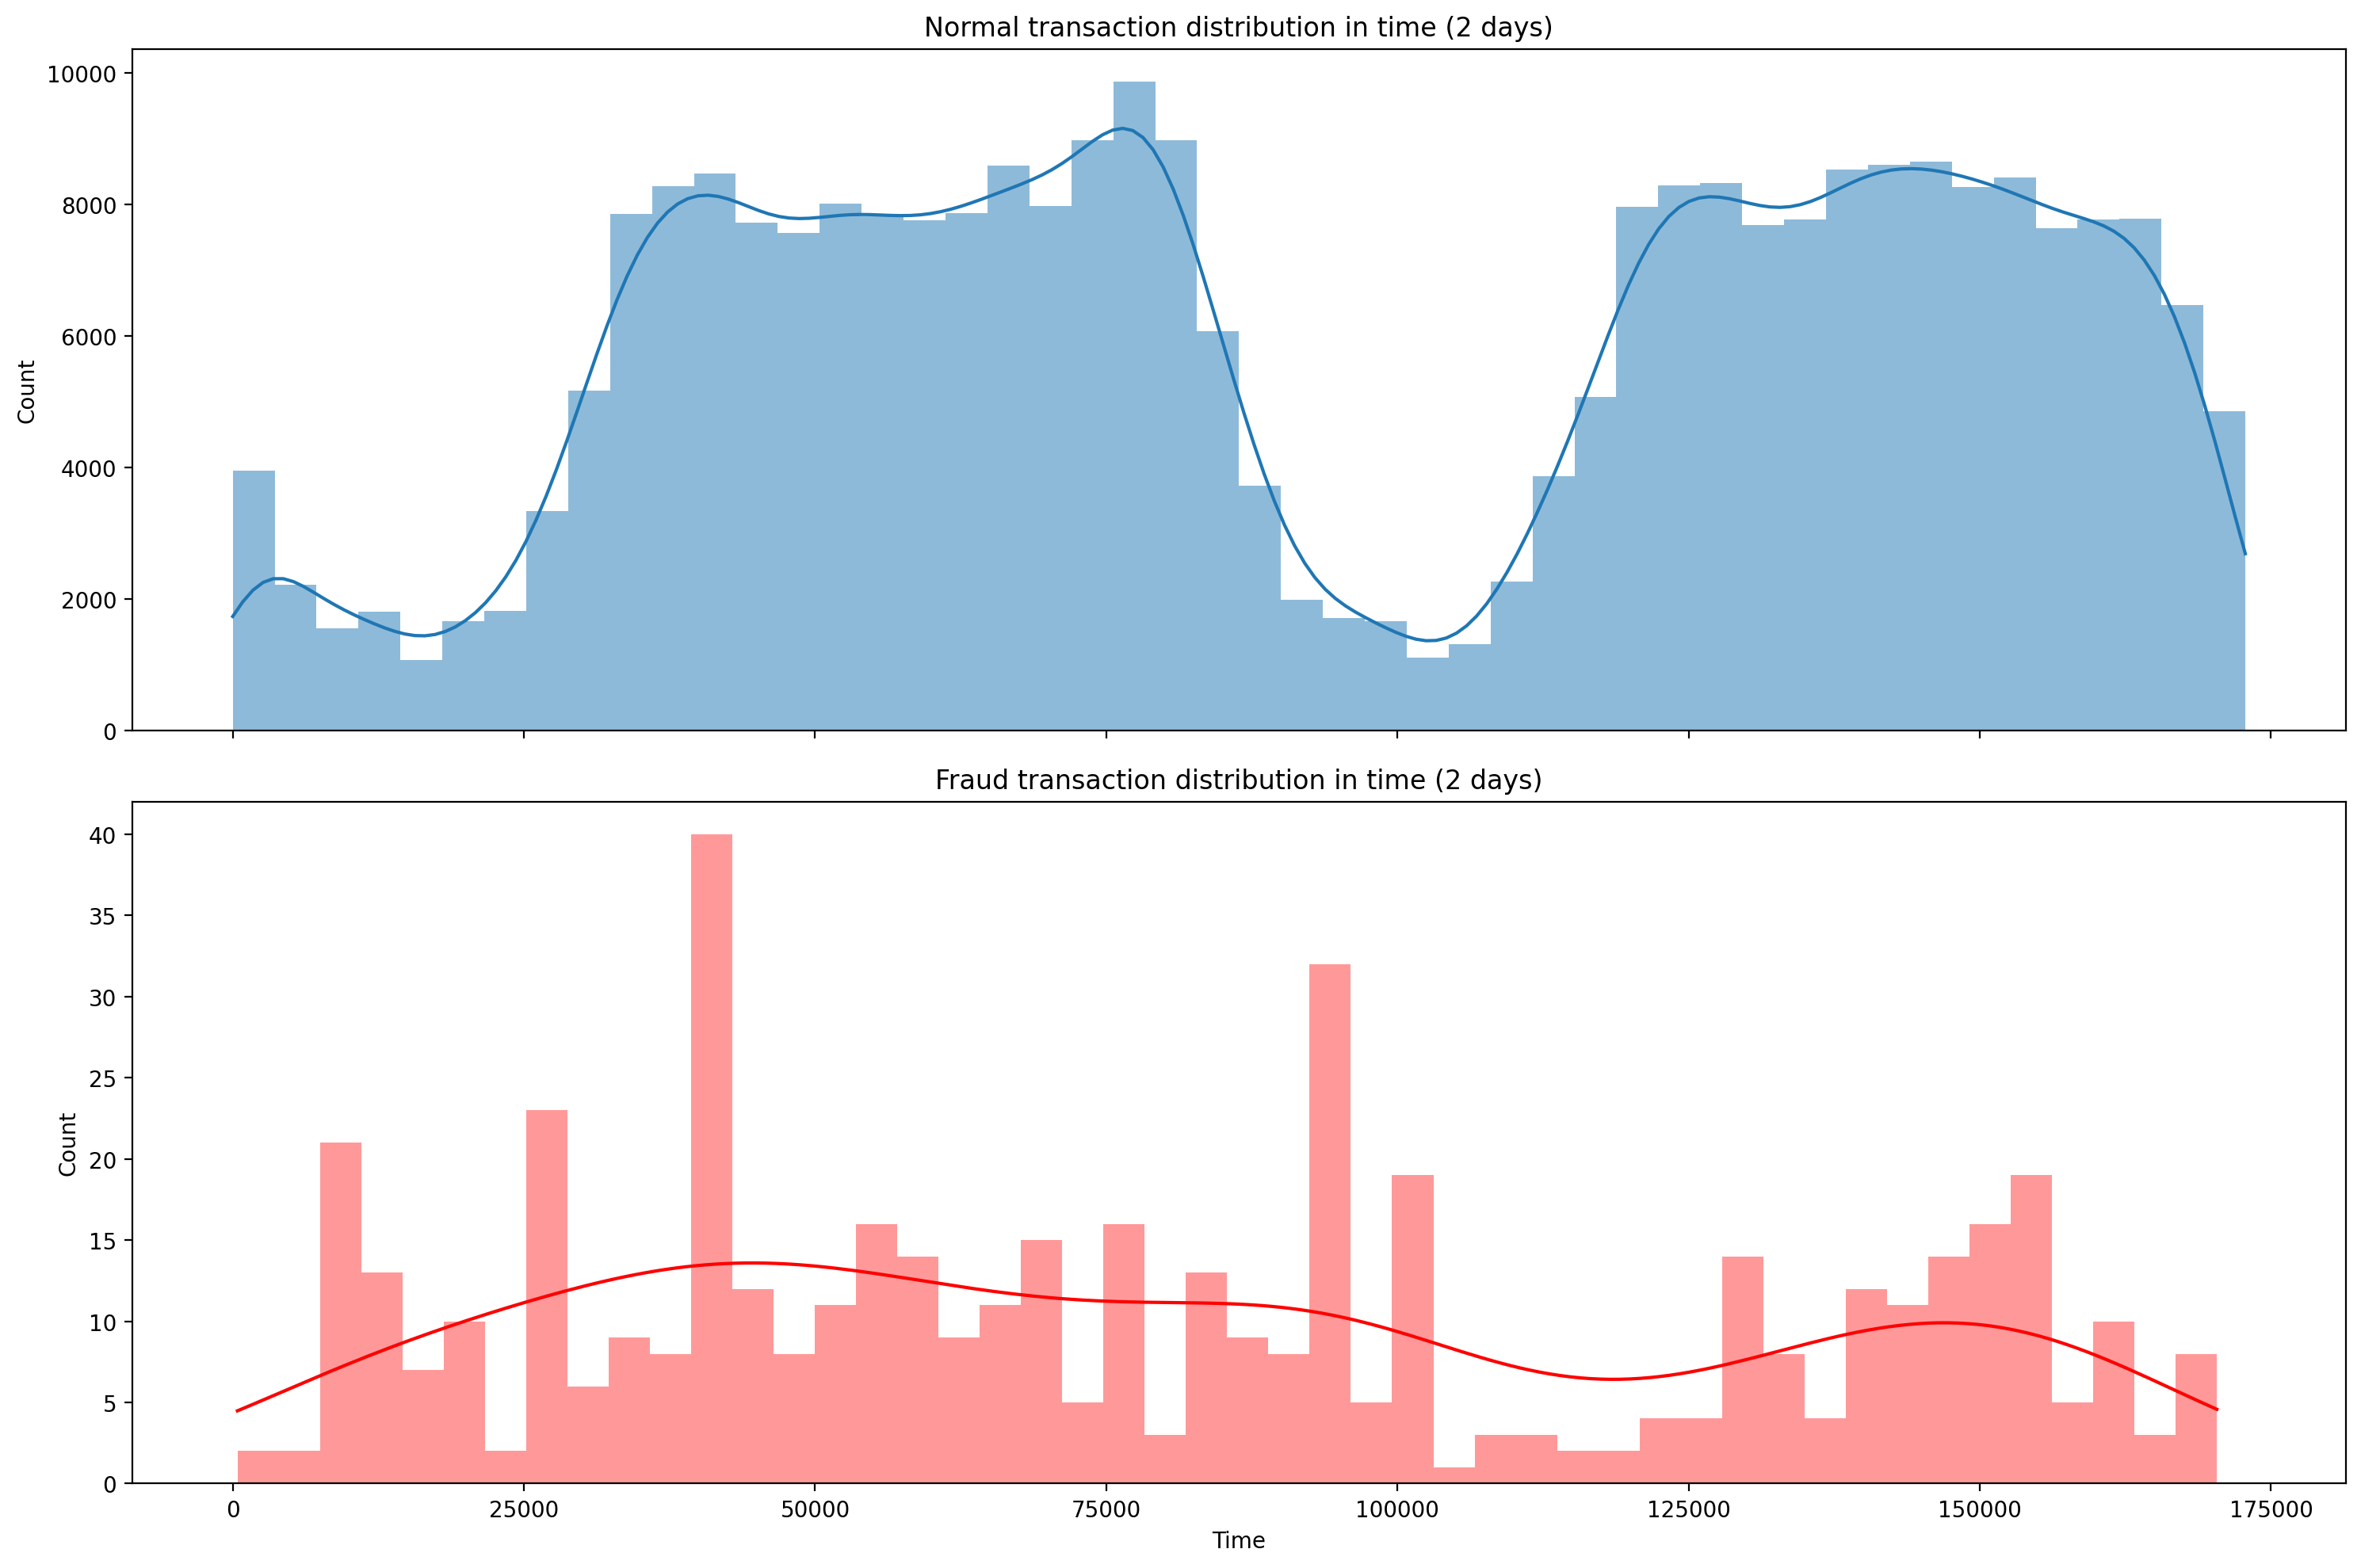

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15,10), dpi=200)

sns.histplot(normal['Time'], bins=48, label='Normal', ax=ax1, kde=True, linewidth=0)
ax1.set_title('Normal transaction distribution in time (2 days)')

sns.histplot(fraud['Time'], bins=48, color='r', label='Fraud', ax=ax2, kde=True, alpha=0.4, linewidth=0)
ax2.set_title('Fraud transaction distribution in time (2 days)')


plt.tight_layout()
# plt.savefig('img/density_bytime.png', dpi=200)
plt.show()

We can see huge differences in the distribution in time: there are time periods when normal transaction might be unusual, however the distribution of fraud is much smoother, we can see here less bumps and this might indicate as time being a good predictor.

In [8]:
#New feature: hour within a day (0-23)
df['Hour'] = df['Time'].apply(lambda x: int(x/3600)%24)

#update the normal/fraud set
normal = df.loc[df['Class']==0]
fraud = df.loc[df['Class']==1]

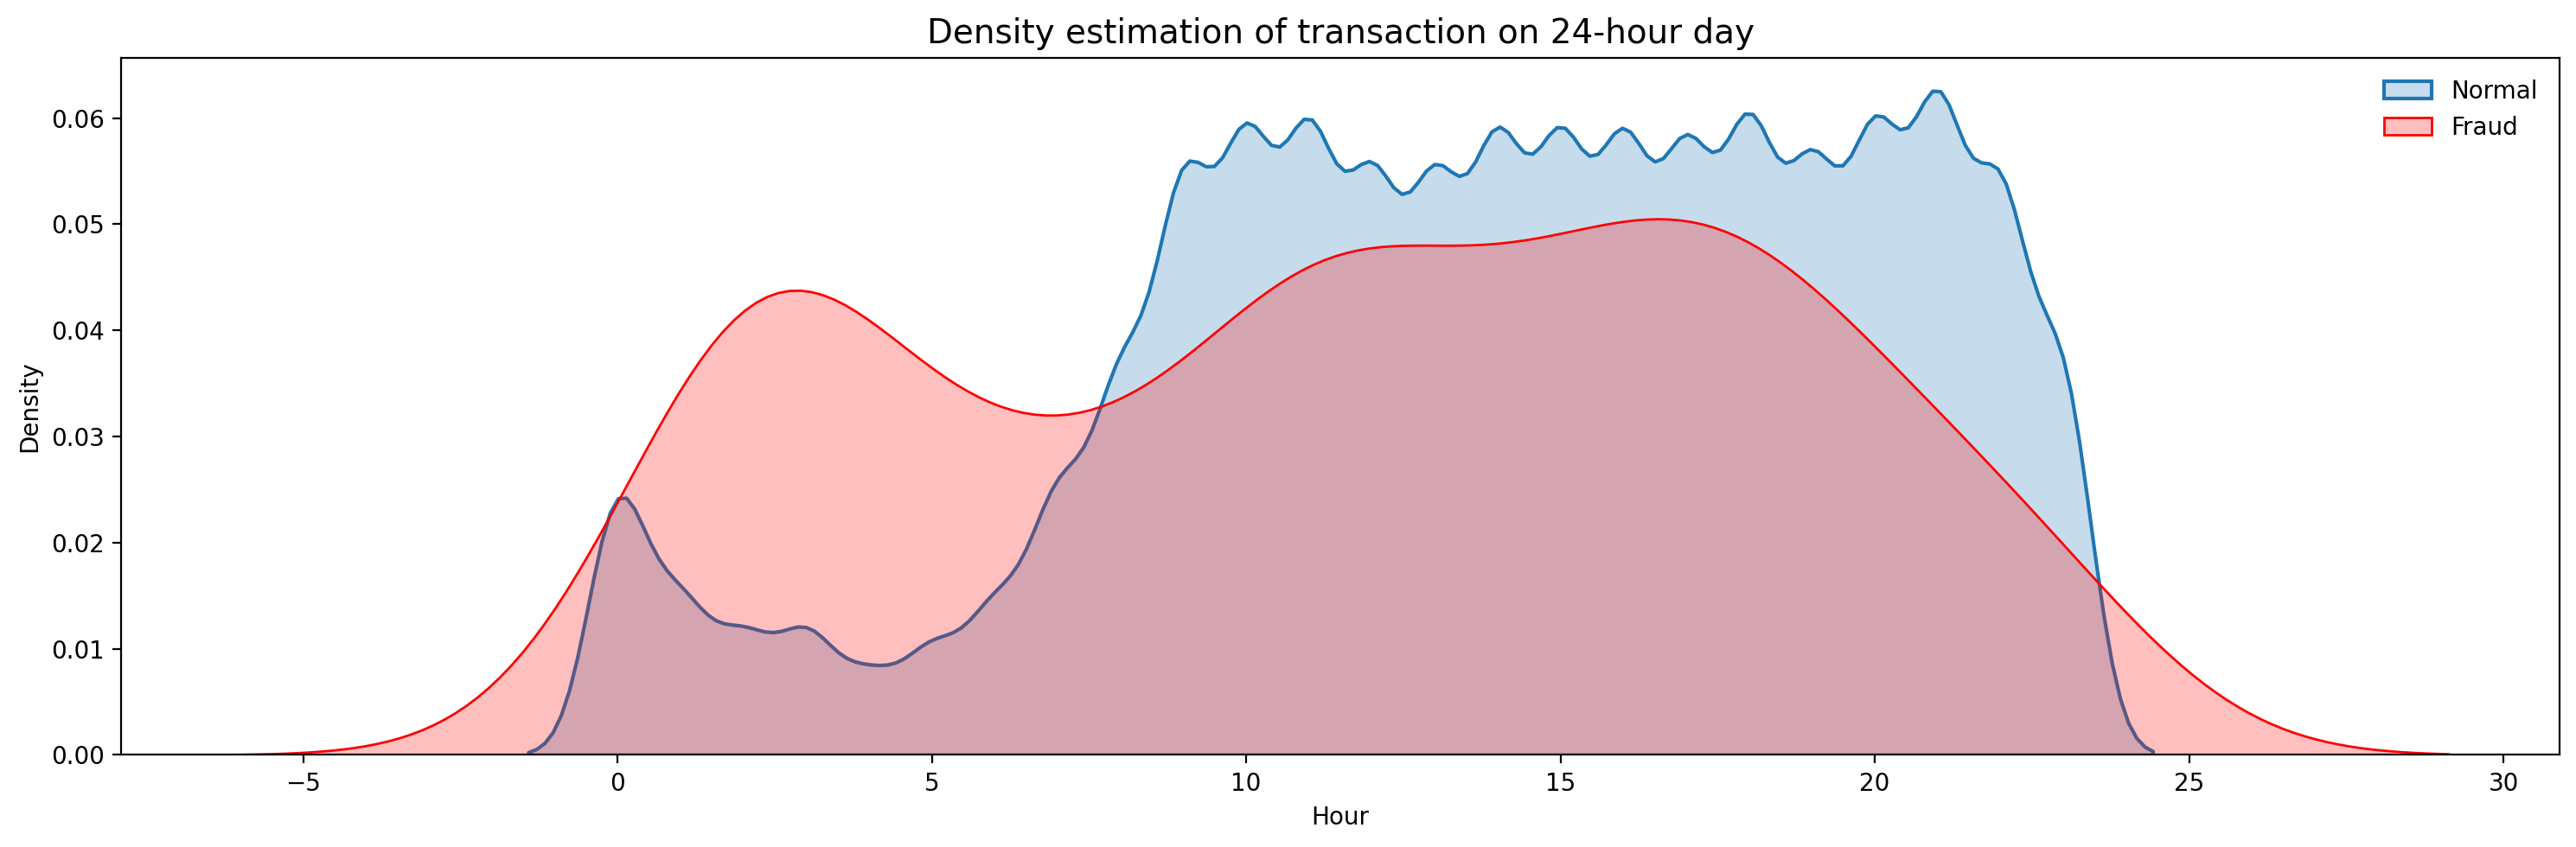

In [15]:
fig = plt.subplots(figsize=(15,5), dpi=200)

sns.kdeplot(normal['Hour'], label='Normal', shade=True, linewidth=1.5)
sns.kdeplot(fraud['Hour'], color='r', bw_method='silverman', label='Fraud', shade=True)

plt.title('Density estimation of transaction on 24-hour day', fontsize=14)

plt.legend(frameon=False)
plt.tight_layout()
# plt.savefig('img/density_byhour.png', dpi=200)
plt.show()

#### Relationship between the amount and the hour of the day

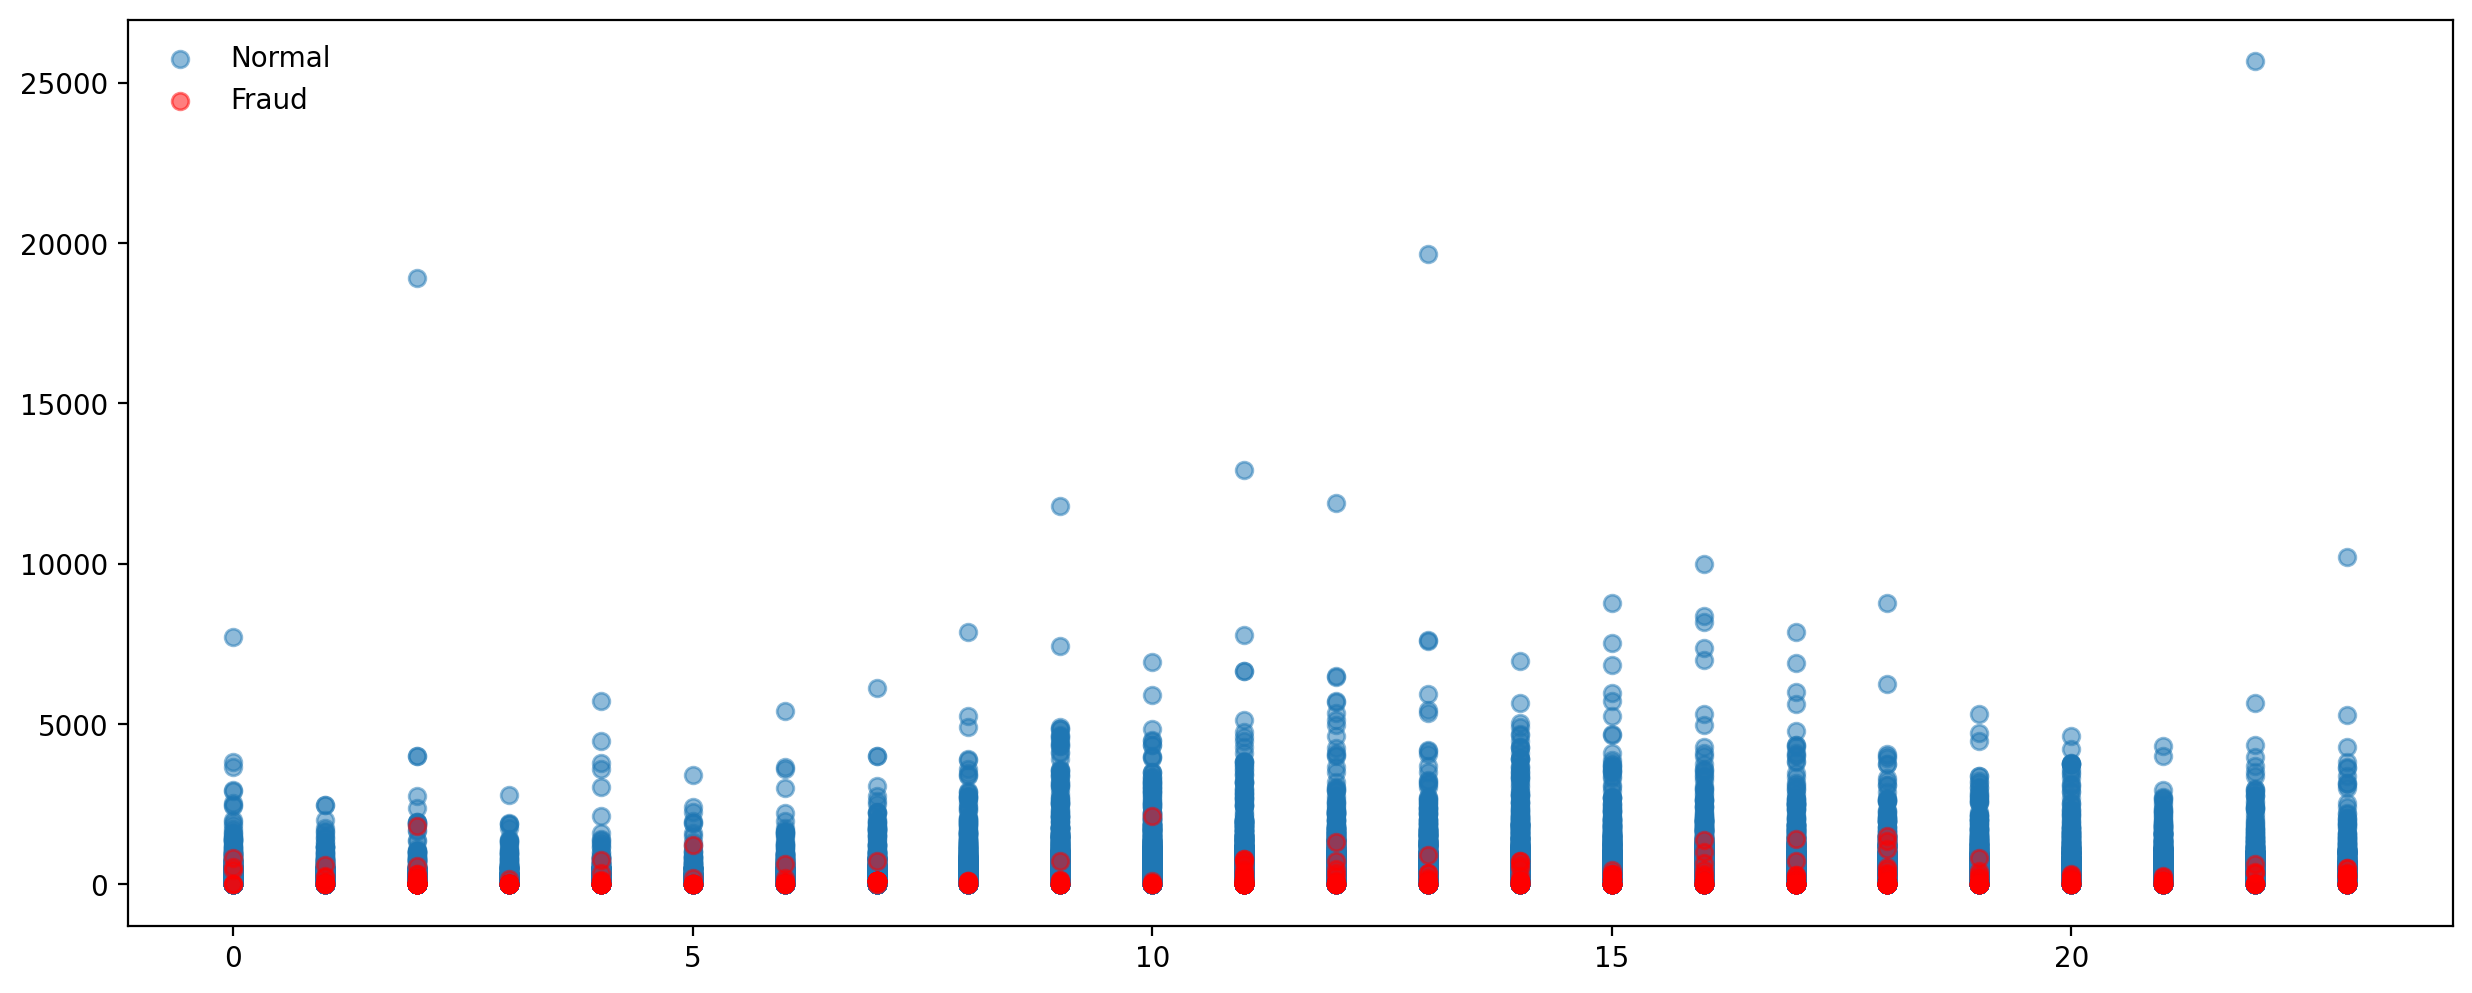

In [16]:
fig = plt.figure(figsize=(15,6), dpi=200)

plt.scatter(normal['Hour'], normal['Amount'], label='Normal', alpha=0.5)
plt.scatter(fraud['Hour'], fraud['Amount'], label='Fraud', c='r', alpha=0.5)

plt.legend(frameon=False)
plt.show()

### 1.5. Scatter plots about pair of features

In [17]:
#downsampling for visualization purpose
np.random.seed(1)
idx = np.random.choice(len(normal), size=5000, replace=False)

normal_sample = normal.iloc[idx]

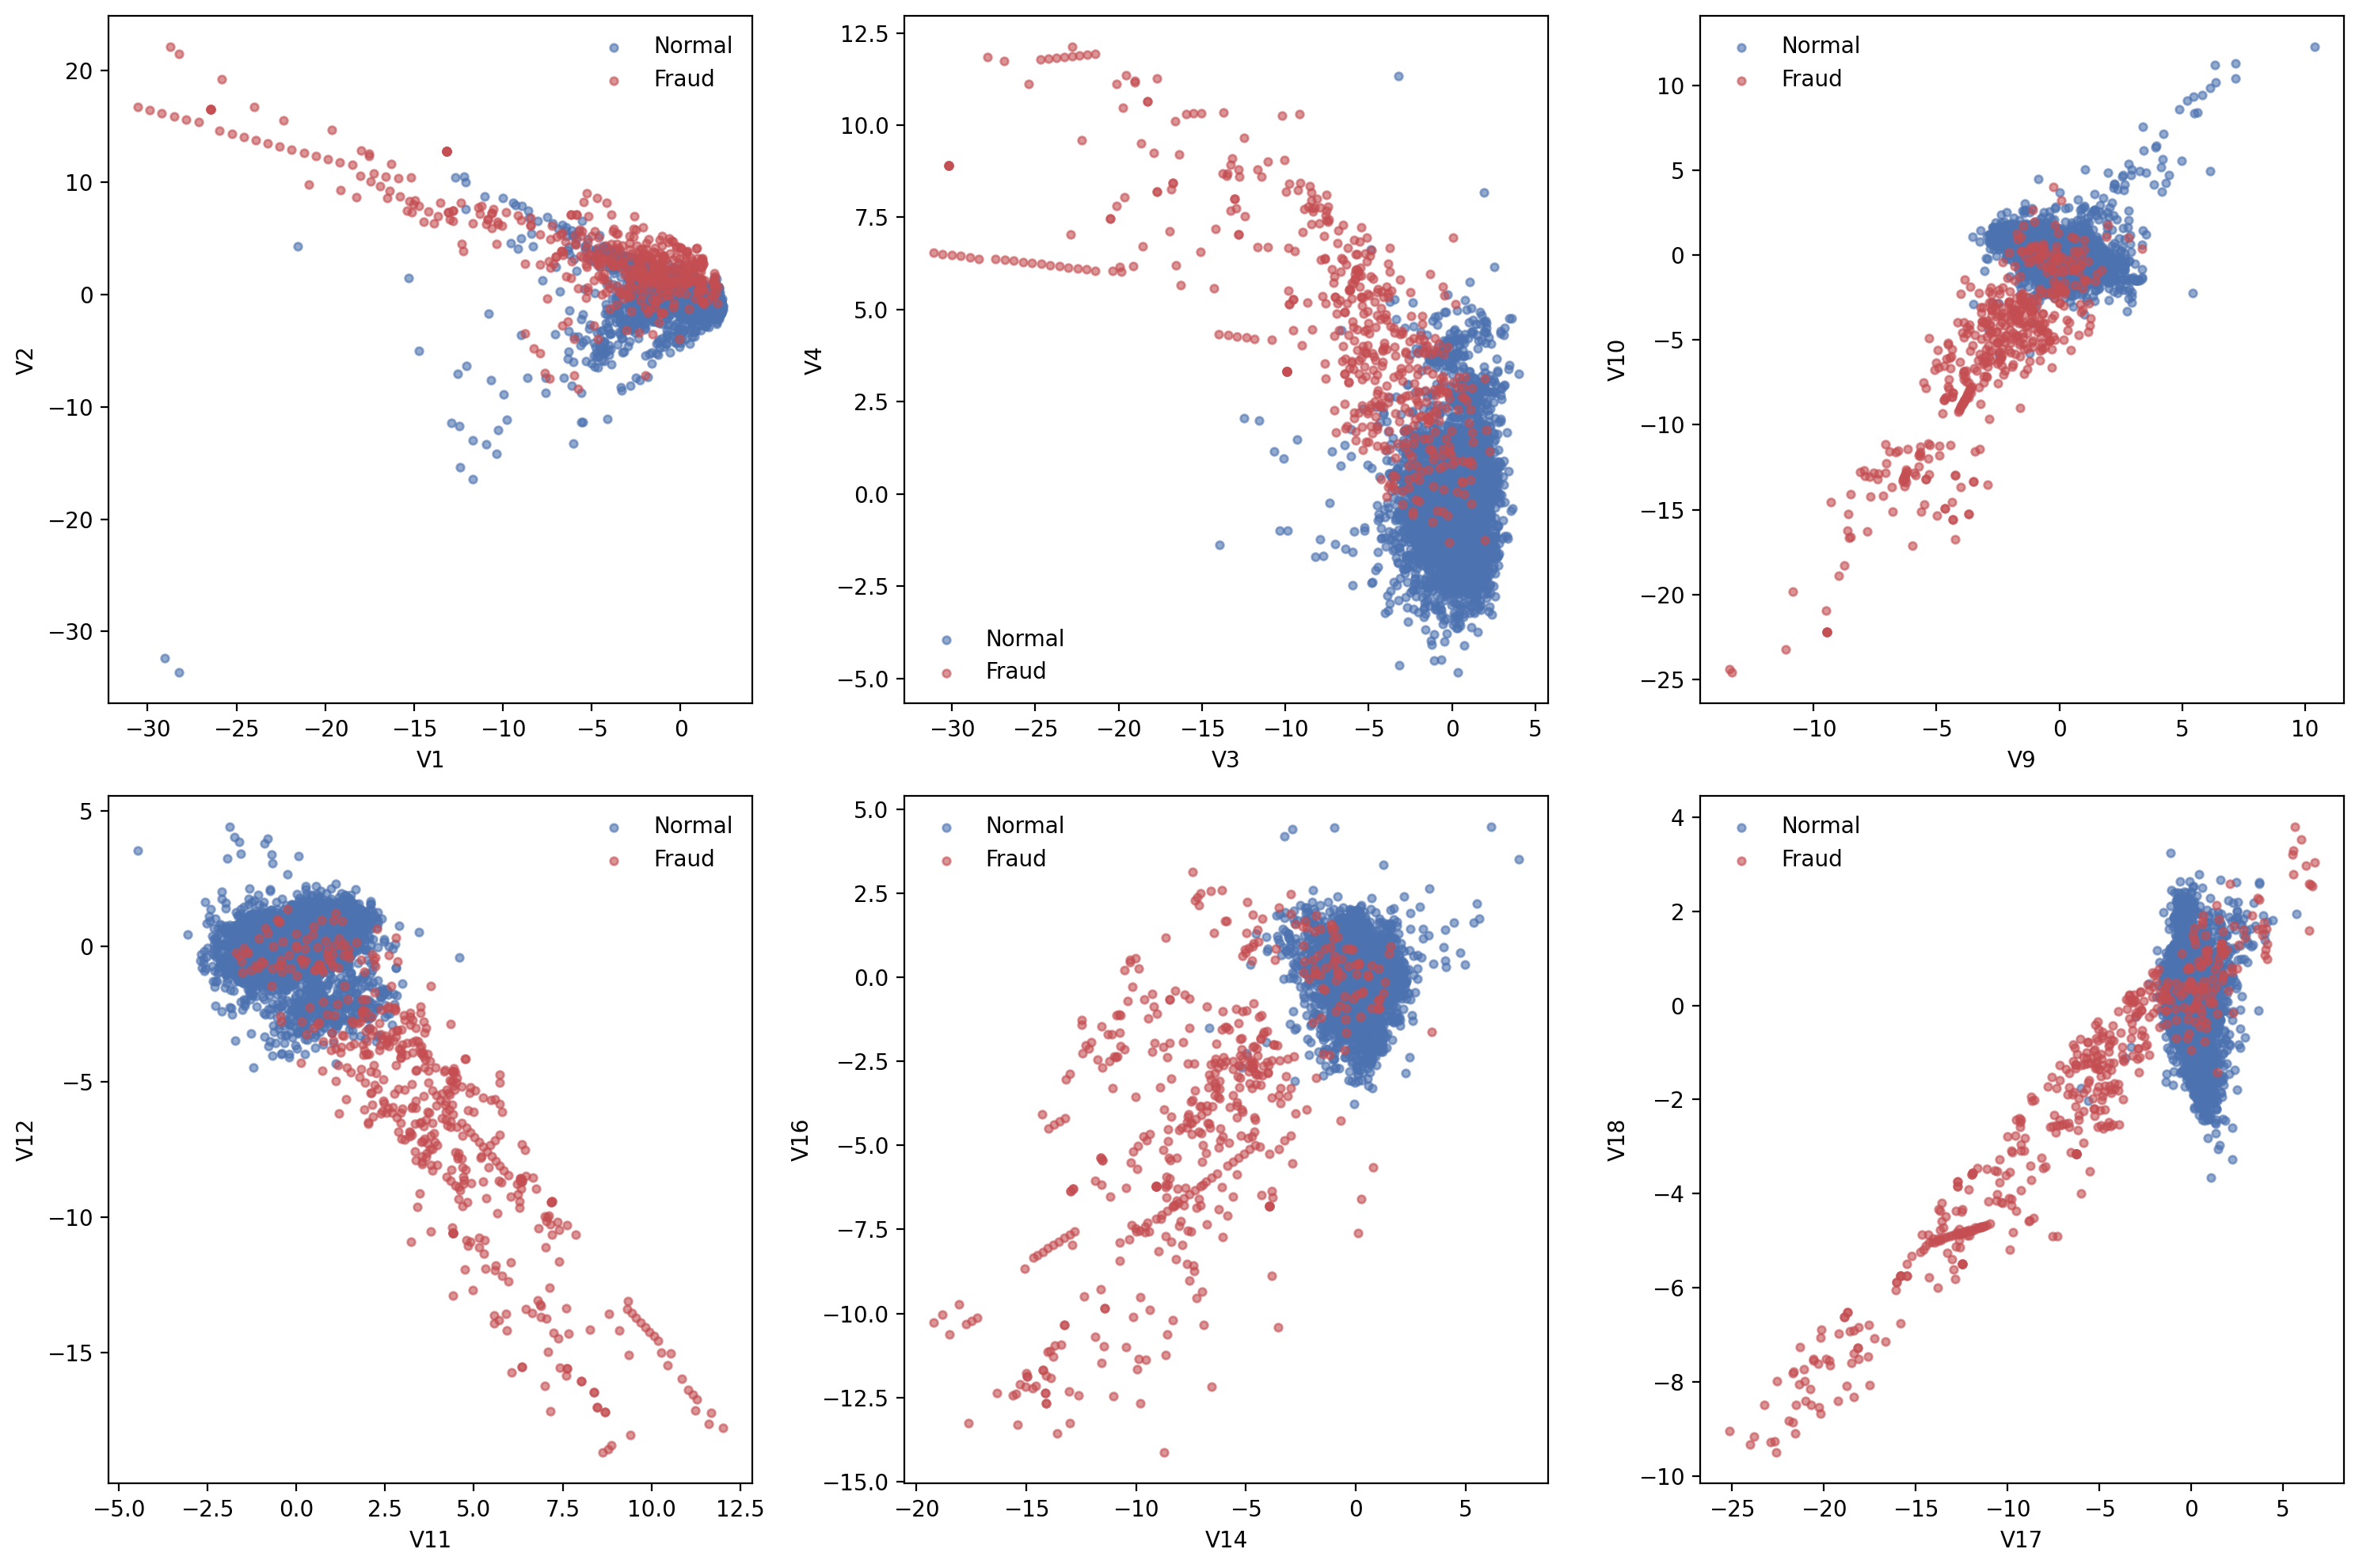

In [18]:
pca_pairs = [('V1', 'V2'), ('V3', 'V4'), ('V9', 'V10'), ('V11', 'V12'), ('V14', 'V16'), ('V17', 'V18')]

fig, axes = plt.subplots(2,3, figsize=(15,10), dpi=200)

for ax, (v1, v2) in zip(axes.flatten(), pca_pairs):
    ax.scatter(normal_sample[v1], normal_sample[v2], c='#4C72B0', alpha=0.6, label='Normal', s=12)
    ax.scatter(fraud[v1], fraud[v2], c='#C44E52', alpha=0.6, label='Fraud', s=12)
    ax.set_xlabel(v1)
    ax.set_ylabel(v2)
    ax.legend(frameon=False)

plt.tight_layout()
# plt.savefig('img/scatter.png', dpi=200)

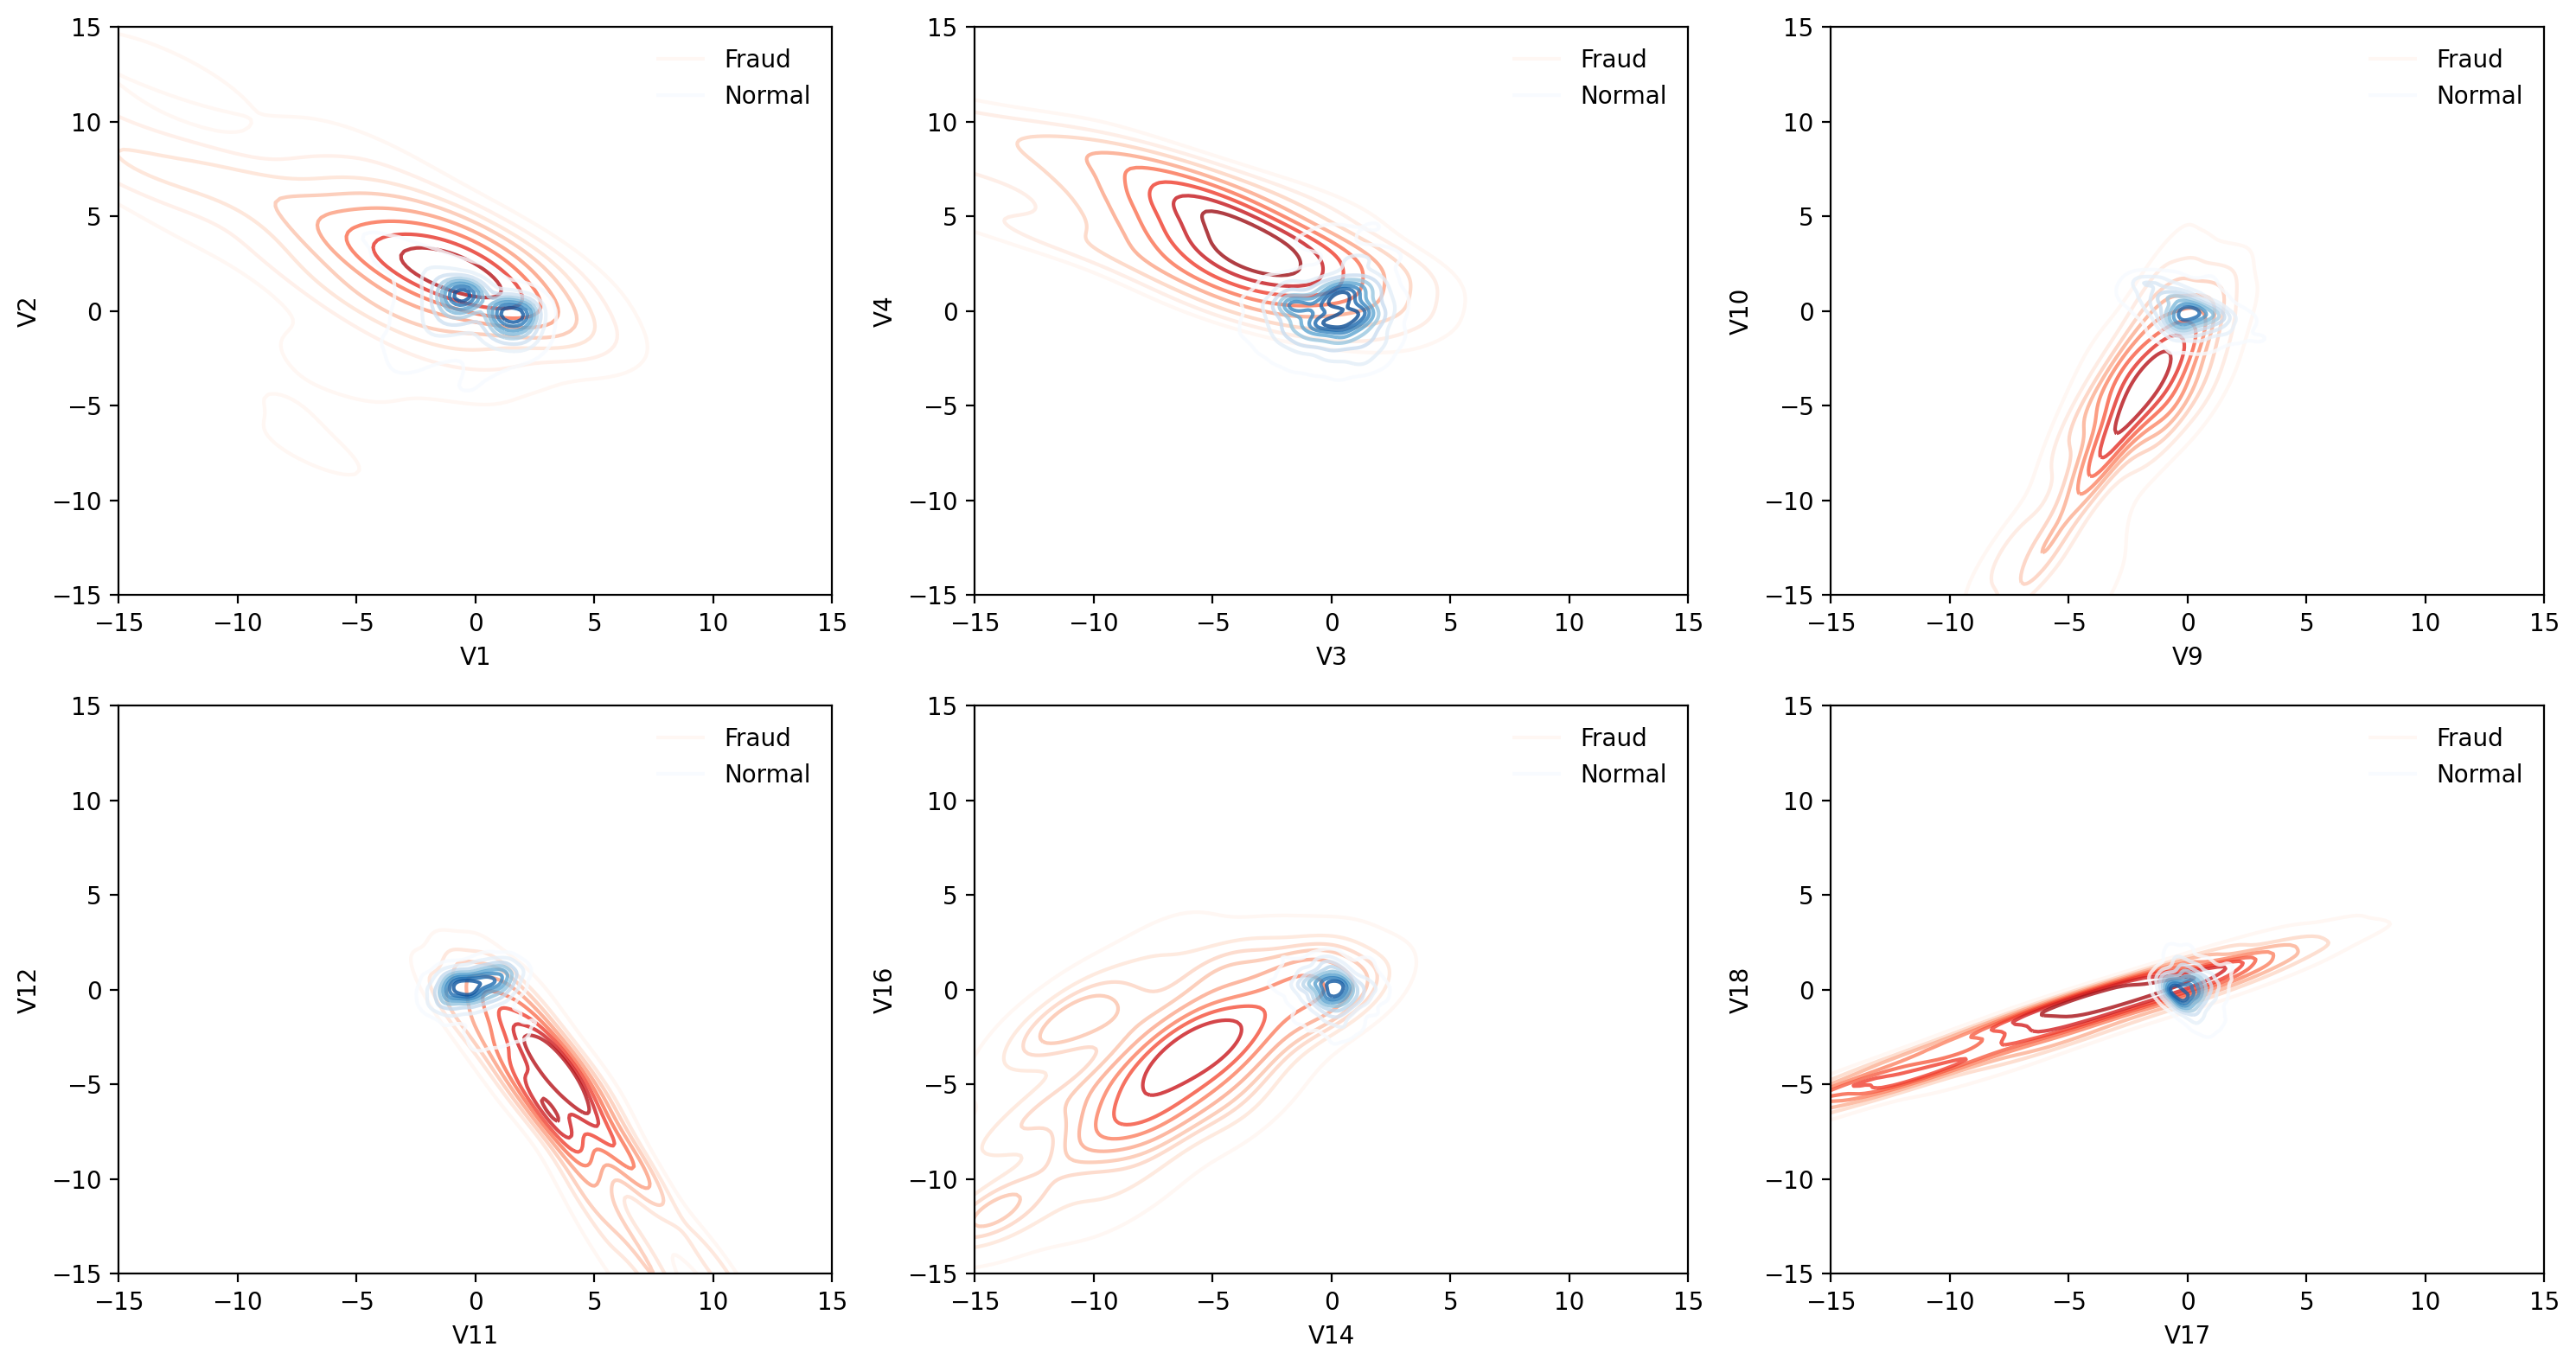

In [19]:
fig, axes = plt.subplots(2,3, figsize=(15,8), dpi=200)

for ax, (v1, v2) in zip(axes.flatten(), pca_pairs):
    sns.kdeplot(data=fraud, x=v1, y=v2, levels=9, ax=ax, alpha=0.8, cmap='Reds', label = 'Fraud', 
                bw_method='silverman', )
    sns.kdeplot(data=normal_sample, x=v1, y=v2, levels=9, bw_method='silverman', alpha=0.8, cmap='Blues', 
                label = 'Normal', ax=ax)
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.legend(frameon=False, loc='best', )

plt.tight_layout()
# plt.savefig('img/joint_kde.png', dpi=200)

Based on the above scatter plots and Kernel Density Estimations using the first 4 most important PCA components, we can see that the majority of the fraudulent transactions are very similar to the non-fraudulent (normal) transaction, and thus linearly not separable. However, there are some fraudulent transactions that are different than the others and it is very likely that they can be found even with linear machine learning algorithms.

### 1.6. Correlation of the features

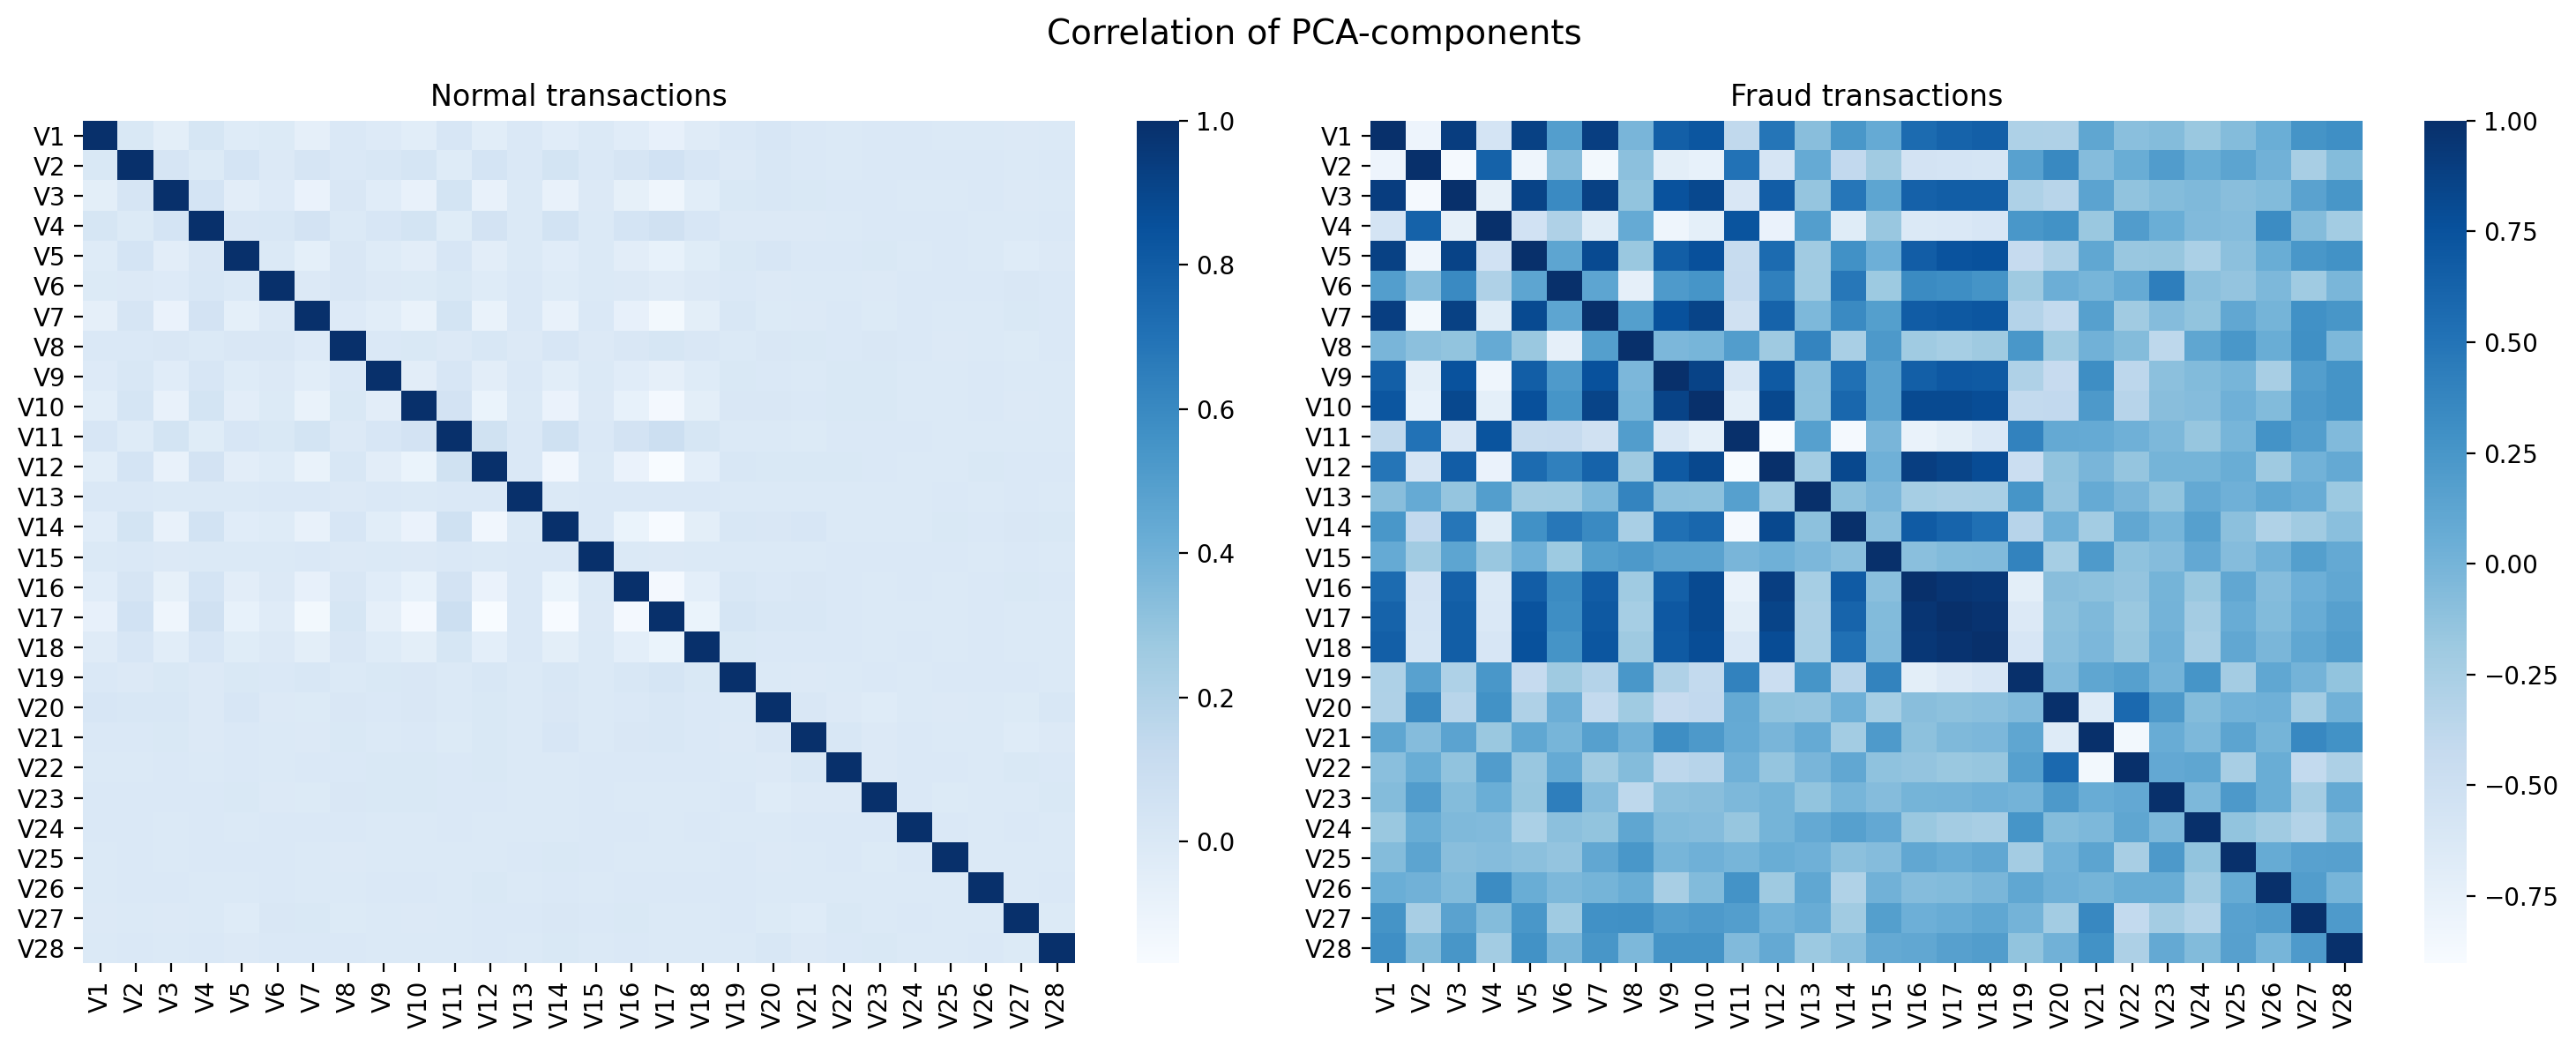

In [43]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15,6), dpi=200)

sns.heatmap(Xtrain.loc[ytrain==0].iloc[:,:-2].corr(), ax=ax0, cmap='Blues', )
sns.heatmap(Xtrain.loc[ytrain==1].iloc[:,:-2].corr(), ax=ax1, cmap='Blues')

ax0.set_title('Normal transactions', fontsize=12)
ax1.set_title('Fraud transactions', fontsize=12)

plt.suptitle('Correlation of PCA-components', fontsize=14)

plt.tight_layout()
plt.savefig('img/corrmap.png')

## 2. Preprocessing

### 2.1. Scaling the features

In [9]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_hour'] = StandardScaler().fit_transform(df['Hour'].values.reshape(-1, 1))

# df = pd.get_dummies(df, columns=['Hour'], drop_first=True)

X = df.drop(columns=['Class', 'Time', 'Hour', 'Amount'])
# X = df.drop(columns=['Class', 'Time', 'Amount'])
y = df['Class']

feats = X.columns.tolist()

print('Features:')
print(feats)

Features:
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_hour']


In [21]:
#update the normal/fraud df
# normal = df.loc[df['Class']==0].drop(columns=['Class', 'Time', 'Hour', 'Amount'])
# fraud = df.loc[df['Class']==1].drop(columns=['Class', 'Time', 'Hour', 'Amount'])

# normal = df.loc[df['Class']==0].drop(columns=['Class', 'Time', 'Amount'])
# fraud = df.loc[df['Class']==1].drop(columns=['Class', 'Time', 'Amount'])

### 2.2. Split the database into train + validation + test set

In [46]:
from sklearn.model_selection import train_test_split

#train_full, test, val are only indices
train_full, test = train_test_split(X.index, test_size=0.2, stratify=y, random_state=1)
train, val = train_test_split(train_full, test_size=0.25, stratify=y[train_full], random_state=1)

Xtrain, ytrain = X.iloc[train], y.iloc[train]
Xval, yval = X.iloc[val], y.iloc[val]
Xtest, ytest = X.iloc[test], y.iloc[test]

print(f'Train set:      {Xtrain.shape},  labels:  {ytrain.shape}')
print(f'Validation set:  {Xval.shape},  labels:  {yval.shape}')
print(f'Test set:        {Xtest.shape},  labels:  {ytest.shape}\n')

print(f'Fraud in train:       {ytrain.sum()},  {ytrain.mean(): .2%}')
print(f'Fraud in validation:   {yval.sum()},  {yval.mean(): .2%}')
print(f'Fraud in test:         {ytest.sum()},   {ytest.mean():.2%}')

Train set:      (170883, 30),  labels:  (170883,)
Validation set:  (56962, 30),  labels:  (56962,)
Test set:        (56962, 30),  labels:  (56962,)

Fraud in train:       295,   0.17%
Fraud in validation:   99,   0.17%
Fraud in test:         98,   0.17%


### 2.3. Saving the split data into csv

In [23]:
#Saving the train-val-test sets

pd.DataFrame(train_full, columns=['train_full_idx']).to_csv('data/train_full_idx.csv')
pd.DataFrame(test, columns=['test_idx']).to_csv('data/test_idx.csv')
pd.DataFrame(train, columns=['train_idx']).to_csv('data/train_idx.csv')
pd.DataFrame(val, columns=['val_idx']).to_csv('data/val_idx.csv')

Xtrain.to_csv('data/Xtrain.csv')
ytrain.to_csv('data/ytrain.csv')
Xval.to_csv('data/Xval.csv')
yval.to_csv('data/yval.csv')
Xtest.to_csv('data/Xtest.csv')
ytest.to_csv('data/ytest.csv')


##   
## 3. Unsupervised Fraud Detection

### 3.1. Multivariate Gaussian Density estimation

The Multivariate Gaussian density estimation can help finding anomalous observation in the following way: first we calculate one or a mixture of the multivariate Gaussian density estimations for the whole dataset which will return the probabilities of a data point belonging to each of the multivariate Gaussian distributions. Using the largest probability estimates with respect to the data point, we can set a threshold value for the probabilities, under which the observation will be considered as anomaly (we select those observations as outliers where it is very unlikely that they come from one of the Gaussian distributions).

Code partially taken from: https://towardsdatascience.com/wondering-how-to-build-an-anomaly-detection-model-87d28e50309

In [53]:
def estimateGaussian(X):
    'Returns the mean vector and sigma_squared of an matrix X '
    X = np.array(X)
    n = X.shape[1]
    m = X.shape[0]
    mu = np.reshape((1/m)*np.sum(X, 0), (1, n))
    sigma2 = np.reshape((1/m)*np.sum(np.power((X - mu),2), 0),(1, n))
    
    return mu, sigma2

import math

def multivariateGaussian(X, mu, sigma2):
    'Returns the probability values of a multivariate Gaussian model'
    X = np.array(X)
    n = np.size(sigma2, 1)
    m = np.size(sigma2, 0)

    if n == 1 or m == 1:
        sigma2 = np.diag(sigma2[0, :])
    
    X = X - mu
    pi = math.pi
    det = np.linalg.det(sigma2)
    inv = np.linalg.inv(sigma2)
    val = np.reshape((-0.5)*np.sum(np.multiply((X@inv),X), 1),(np.size(X, 0), 1))
    p = np.power(2*pi, -n/2)*np.power(det, -0.5)*np.exp(val)

    return p.ravel()

def find_eps(true_labels, pval):
    'Returns the epsilon_values, the corresponding f1_values and the best epsilon'
    f1_vals = []
    eps_vals = np.logspace(-10, -40, 200)
    for eps in eps_vals:
        model_labels = np.where(pval>eps, 0, 1)
        f1_vals.append(f1_score(true_labels, model_labels))
    best_eps = eps_vals[np.argmax(f1_vals)]
    return eps_vals, f1_vals, best_eps

Let's run the Gaussian density estimation for every feature one-by-one and let's see how well they perform alone. Then we order the features by F1-score. This will be the base to select the best features in multivariate Gaussian model.

In [25]:
f1_scores = []

for feat in feats:
    #iterates over the pca components:
    xtrain_v = Xtrain[[feat]]
    
    #run the model:
    mu, sigma2 = estimateGaussian(xtrain_v)
    pval = multivariateGaussian(xtrain_v, mu, sigma2)
    
    #find the best epsilon parameters:
    _, f1_vals, best_eps = find_eps(ytrain, pval)
    
    f1_scores.append({'feat': feat, 'F1':max(f1_vals), 'eps': best_eps})

In [26]:
pd.set_option("display.float", "{:.3f}".format)
pd.DataFrame(f1_scores).sort_values(by='F1', ascending=False)

feat    F1   eps
13            V14 0.600 0.000
16            V17 0.557 0.000
11            V12 0.514 0.000
15            V16 0.442 0.000
2              V3 0.278 0.000
9             V10 0.257 0.000
10            V11 0.244 0.000
17            V18 0.239 0.000
6              V7 0.225 0.000
4              V5 0.150 0.000
0              V1 0.121 0.000
3              V4 0.103 0.000
8              V9 0.078 0.000
7              V8 0.067 0.000
1              V2 0.058 0.000
20            V21 0.040 0.000
21            V22 0.037 0.000
26            V27 0.033 0.000
22            V23 0.028 0.000
19            V20 0.013 0.000
24            V25 0.012 0.000
28  scaled_amount 0.002 0.000
5              V6 0.000 0.000
14            V15 0.000 0.000
18            V19 0.000 0.000
12            V13 0.000 0.000
23            V24 0.000 0.000
25            V26 0.000 0.000
27            V28 0.000 0.000
29    scaled_hour 0.000 0.000

In [54]:
feat_set1 = pd.DataFrame(f1_scores).sort_values(by='F1', ascending=False)['feat'].tolist()
print(feat_set1)

['V17', 'V14', 'V12', 'V16', 'V3', 'V11', 'V7', 'V10', 'V18', 'V5', 'V1', 'V8', 'V2', 'V4', 'V22', 'V21', 'V9', 'V23', 'V27', 'V6', 'V19', 'V20', 'V13', 'V15', 'V24', 'V25', 'V26', 'V28', 'scaled_amount', 'scaled_hour']


In [55]:
Xtrain_normal = Xtrain.loc[ytrain==0]

#iterates over the pca components:
for i in range(1, 8):
    #the train set:
    xtrain_v = Xtrain_normal[feat_set1[:i]]
    #the validation set:
    xval_v = Xval[feat_set1[:i]]
    
    #run the model:
    mu, sigma2 = estimateGaussian(xtrain_v)
    pval = multivariateGaussian(xval_v, mu, sigma2) #epsilon is tuned on the validation set
    
    #find the best epsilon parameters:
    _, f1_vals, best_eps = find_eps(yval, pval)
    
    print(f'-------- {i} PCA component(s) --------')
    print(f'Highest F1-score: {max(f1_vals):.3f}, at eps={best_eps}\n')

-------- 1 PCA component(s) --------
Highest F1-score: 0.592, at eps=7.067181273927477e-11

-------- 2 PCA component(s) --------
Highest F1-score: 0.691, at eps=1.702769172225898e-14

-------- 3 PCA component(s) --------
Highest F1-score: 0.703, at eps=1.275051240713018e-19

-------- 4 PCA component(s) --------
Highest F1-score: 0.701, at eps=1.1226677735108113e-20

-------- 5 PCA component(s) --------
Highest F1-score: 0.613, at eps=4.347013158125017e-23

-------- 6 PCA component(s) --------
Highest F1-score: 0.612, at eps=2.381685551976161e-25

-------- 7 PCA component(s) --------
Highest F1-score: 0.498, at eps=2.0729217795953614e-37



In [68]:
#run the model:
mu, sigma = estimateGaussian(Xtrain_normal[['V12', 'V14', 'V16', 'V17']])
pval = multivariateGaussian(Xval[['V12', 'V14', 'V16',  'V17']], mu, sigma)

#find the best epsilon parameters:
eps_vals, f1_vals, best_eps = find_eps(yval, pval)

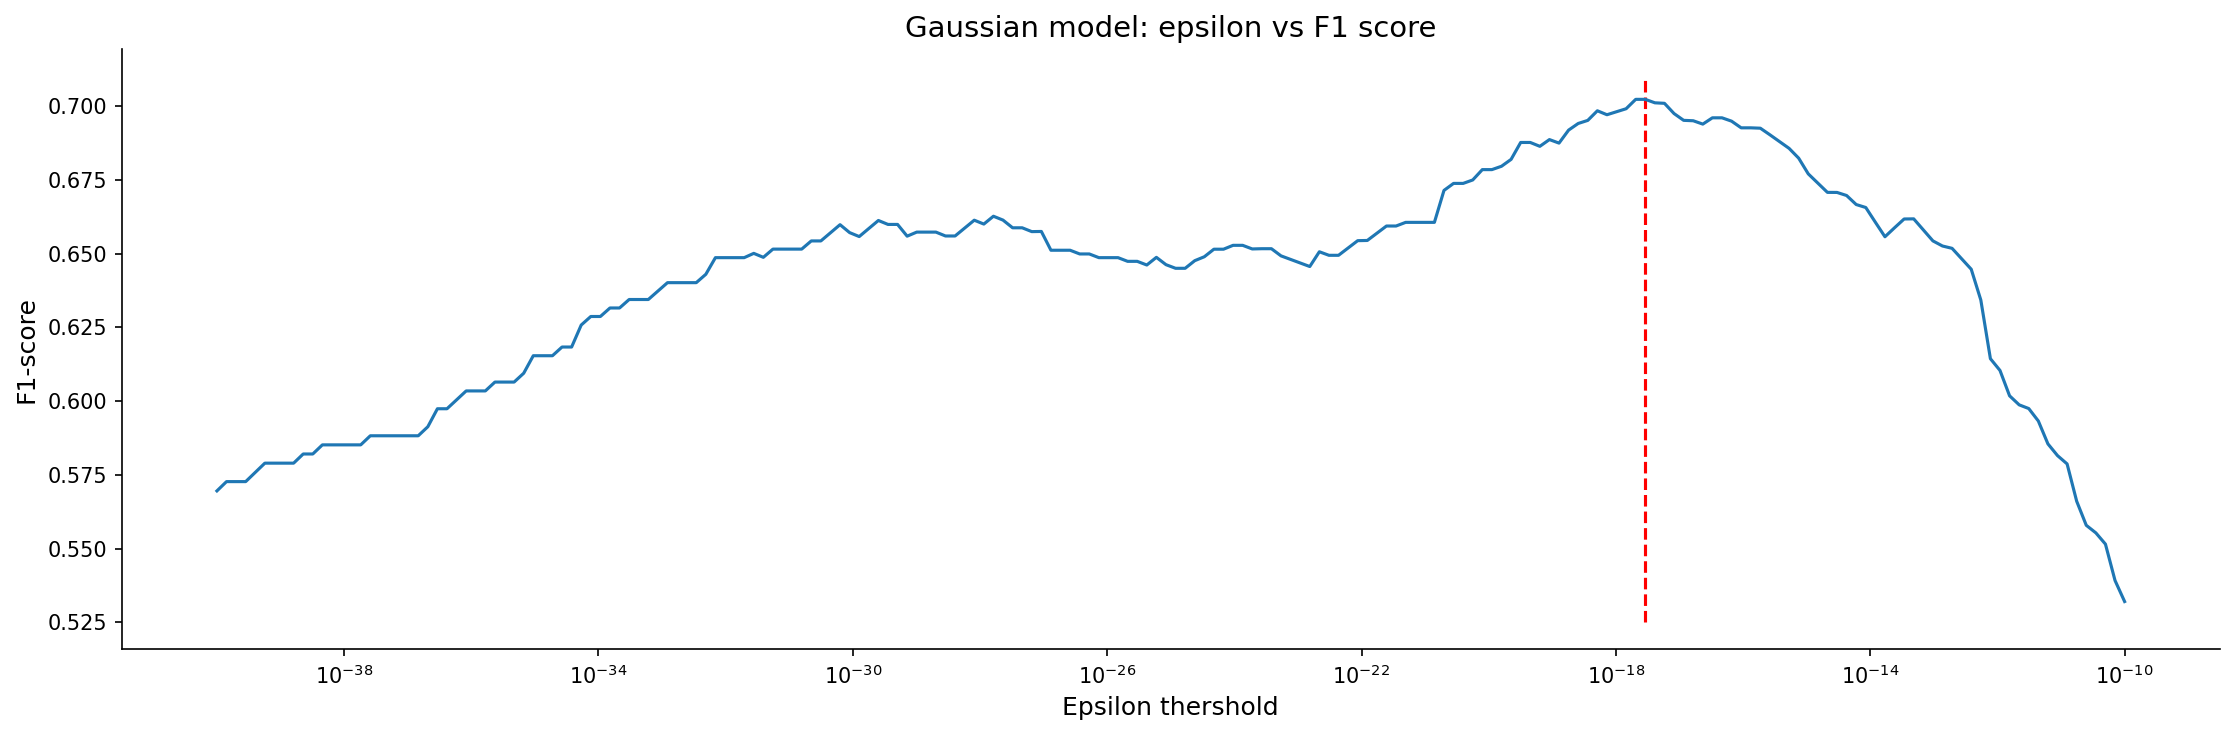

In [30]:
#------ viz the Eps vs F1-scores ---------
fig = plt.figure(figsize=(15,5), dpi=150)
plt.plot(eps_vals[::-1], f1_vals[::-1])
plt.vlines(best_eps, ymin=0.525, ymax=0.71, colors='r', linestyles='--', label='Best epsilon')

ax = plt.gca()
ax.set_xscale('log')
plt.title('Gaussian model: epsilon vs F1 score', fontsize=14)
plt.xlabel('Epsilon thershold', fontsize=12)
plt.ylabel('F1-score', fontsize=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

In [69]:
#test the model on the test set:
pval_test = multivariateGaussian(Xtest[['V12', 'V14', 'V16', 'V17']], mu, sigma)
pred_test = np.where(pval_test>best_eps, 0, 1)

#report
print(classification_report(ytest, pred_test, digits=3))

disp_conf_matrix(ytest, pred_test)

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     56864
           1      0.703     0.847     0.769        98

    accuracy                          0.999     56962
   macro avg      0.852     0.923     0.884     56962
weighted avg      0.999     0.999     0.999     56962



Pred_0  Pred_1
True_0   56829      35
True_1      15      83

### 3.2. DBSCAN

DBSCAN: Density-Based Spatial Clustering of Applications with Noise is a clustering algorithm that formulates clusters based on the density of the data points and thus it makes possible to create clusters of arbitrary shape. 

This algorithm requires two parameters: 
* `epsilon`: describes the maximum distance (using a distance metric by our choice) between two data points to be considered neighboring data points and assign them to the same cluster, 
* `min_samples`: the minimum number of neighbors as a requirement that a data point being assigned to a cluster. 

Although DBSCAN was primarily designed for clustering, it also can be used in outlier detection: data points that cannot be assigned to any clusters (also referred as "noise points") are considered outliers.

Good for data which contains clusters of similar density.

Tuning epsilon code source: https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

#### A.) Finding the epsilon parameter: "the critical change in curve" 

Based on the following description: https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561

In [75]:
# First, we examine the distances between the data points:
neighbors = NearestNeighbors(n_neighbors=18).fit(Xtrain[['V12', 'V14', 'V16', 'V17']])
distances, indices = neighbors.kneighbors(Xtrain[['V12', 'V14', 'V16', 'V17']])

distances = np.sort(distances[:, 1]) #sorted distances between data points and its closest neighbors

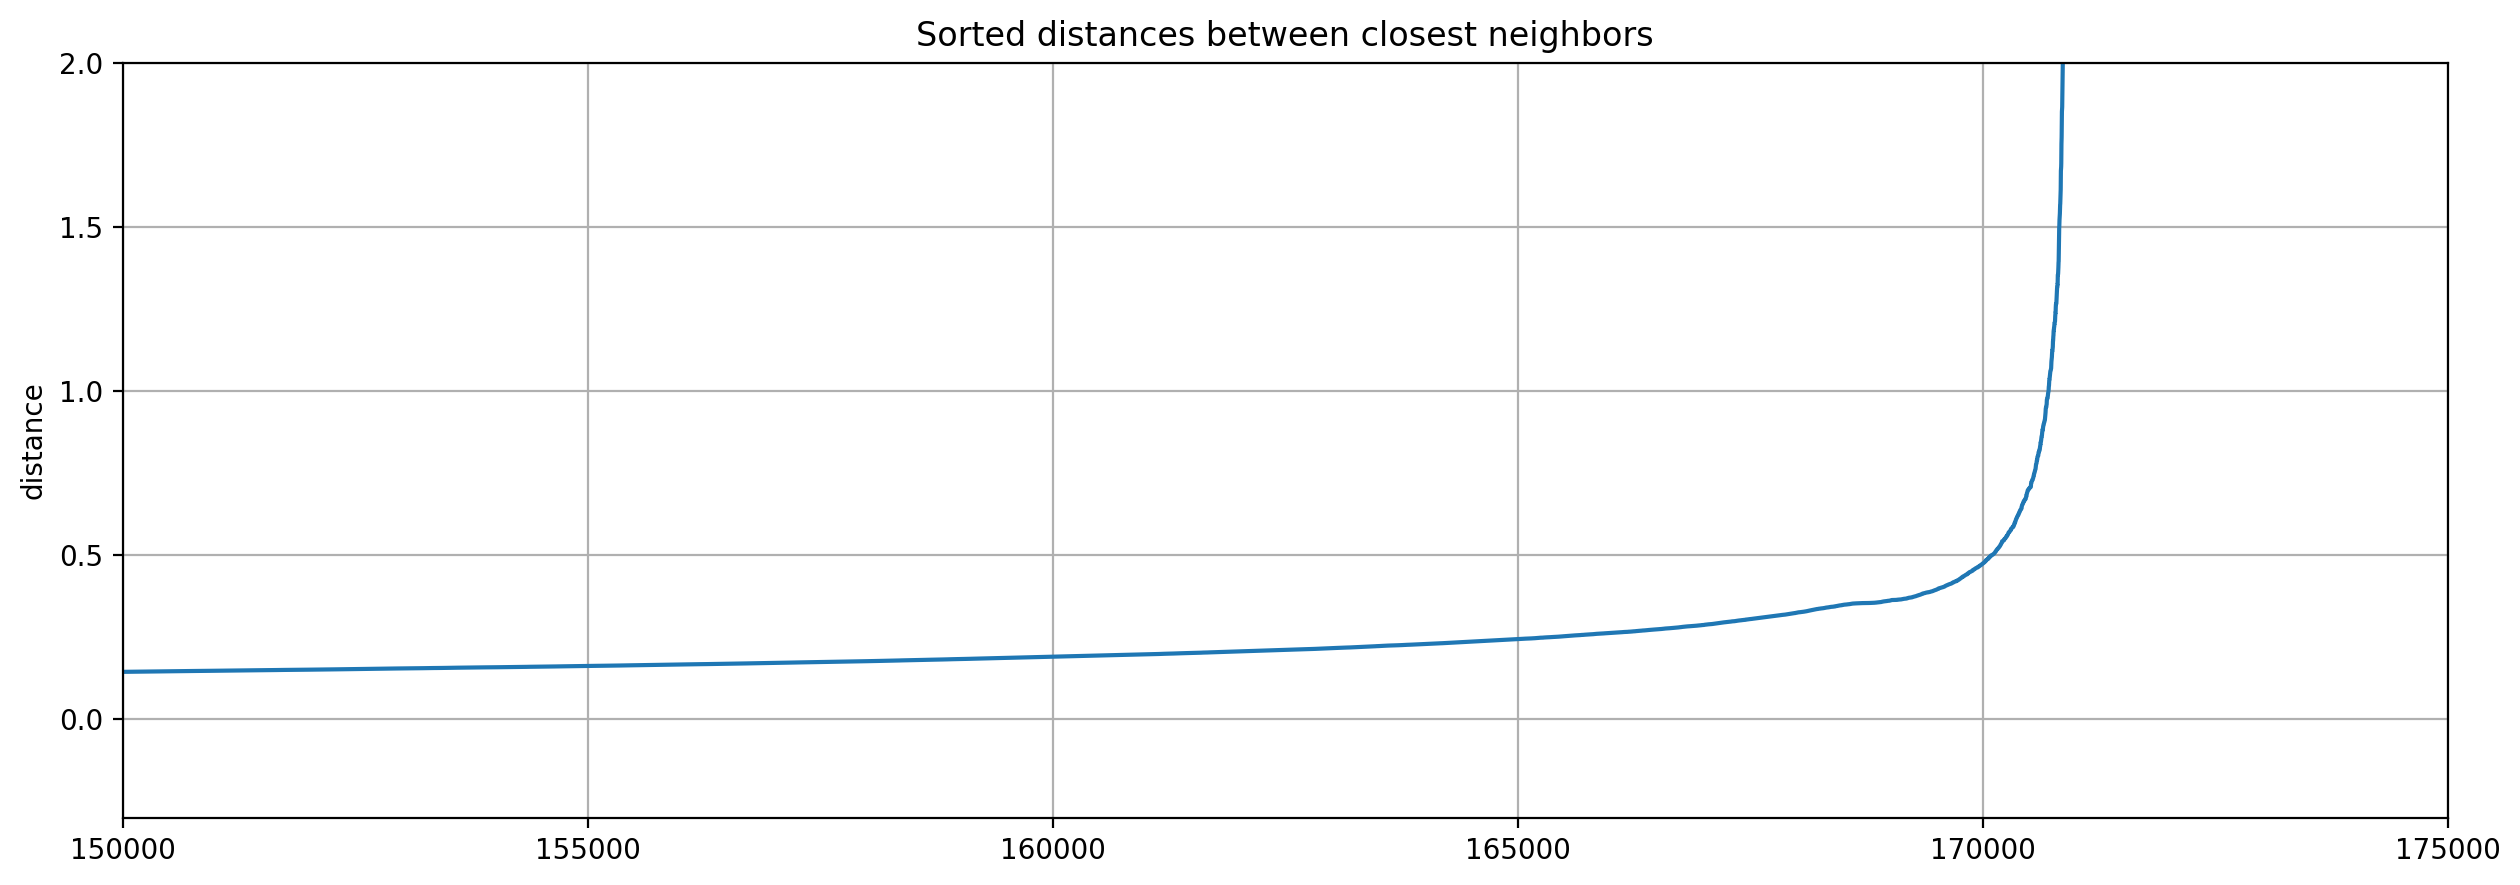

In [76]:
fig = plt.figure(figsize=(15,5), dpi=200)

plt.plot(distances)
plt.ylabel('distance')
plt.title('Sorted distances between closest neighbors')
plt.xlim(left=150000, right=175000)
plt.ylim(top=2, bottom=-0.3)
plt.grid()

plt.show()

In [14]:
dbscan1 = DBSCAN(eps=0.55, min_samples=5, metric='euclidean', n_jobs=-1)
dbscan1.fit(Xtrain[['V12', 'V14', 'V16', 'V17']])
model_labels = np.where(dbscan1.labels_==-1, 1, 0)

print(classification_report(ytrain, model_labels, digits=3))
disp_conf_matrix(ytrain, model_labels)

              precision    recall  f1-score   support

           0      1.000     0.994     0.997    170588
           1      0.194     0.824     0.315       295

    accuracy                          0.994    170883
   macro avg      0.597     0.909     0.656    170883
weighted avg      0.998     0.994     0.996    170883



Pred_0  Pred_1
True_0  169581    1007
True_1      52     243

#### B.) Finding epsilon value: based on the potential number of outliers

In [36]:
ytrain.sum()

295

There are 295 anomalies in the train dataset, so we will select an epsilon value which captures at least that given number of outliers in the train set.

In [37]:
print(f'Epsilon will be selected between: {distances[-295]:.3f} and {distances[-600]:.3f}')

Epsilon will be selected between: 0.797 and 0.569


In [38]:
dbscan = DBSCAN(eps=0.71, min_samples=5, metric='euclidean', algorithm='auto', leaf_size=30, n_jobs=-1)
dbscan.fit(Xtrain[['V12', 'V14', 'V16', 'V17']])
model_labels = np.where(dbscan.labels_==-1, 1, 0)

In [39]:
print(classification_report(ytrain, model_labels, digits=3))
disp_conf_matrix(ytrain, model_labels)

              precision    recall  f1-score   support

           0      1.000     0.997     0.998    170588
           1      0.316     0.790     0.452       295

    accuracy                          0.997    170883
   macro avg      0.658     0.893     0.725    170883
weighted avg      0.998     0.997     0.997    170883



Pred_0  Pred_1
True_0  170084     504
True_1      62     233

In [40]:
dbscan_test = DBSCAN(eps=0.71, min_samples=5, metric='euclidean', algorithm='auto', leaf_size=30, n_jobs=-1)
dbscan_test.fit(Xtest[['V12', 'V14', 'V16', 'V17']])
test_labels = np.where(dbscan_test.labels_==-1, 1, 0)

In [41]:
print(classification_report(ytest, test_labels, digits=3))
disp_conf_matrix(ytest, test_labels)

              precision    recall  f1-score   support

           0      1.000     0.994     0.997     56864
           1      0.194     0.898     0.319        98

    accuracy                          0.993     56962
   macro avg      0.597     0.946     0.658     56962
weighted avg      0.998     0.993     0.996     56962



Pred_0  Pred_1
True_0   56498     366
True_1      10      88

#### C.) Tune the `epsilon` and `min_sample` parameters together

In [19]:
eps_params = [0.6, 0.8, 1.0, 1.2, 1.5]
min_pts_params = [3, 5, 8, 10]

dbscan_models = []
for min_pts in min_pts_params: 
    for eps in eps_params:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts, metric='euclidean', algorithm='auto', leaf_size=30, n_jobs=-1)
        dbscan.fit(Xval[['V12', 'V14', 'V16', 'V17']])
        pred_labels = np.where(dbscan.labels_==-1, 1, 0)
        f1 = f1_score(yval, pred_labels)
        
        model = {'eps': eps, 'minPts': min_pts, 'f1':f1}
        dbscan_models.append(model)
        
        print(f'F1-score: {f1:.3f} at minPts: {min_pts} and epsilon: {eps}')

F1-score: 0.263 at minPts: 3 and epsilon: 0.6
F1-score: 0.397 at minPts: 3 and epsilon: 0.8
F1-score: 0.492 at minPts: 3 and epsilon: 1.0
F1-score: 0.530 at minPts: 3 and epsilon: 1.2
F1-score: 0.482 at minPts: 3 and epsilon: 1.5
F1-score: 0.216 at minPts: 5 and epsilon: 0.6
F1-score: 0.332 at minPts: 5 and epsilon: 0.8
F1-score: 0.487 at minPts: 5 and epsilon: 1.0
F1-score: 0.573 at minPts: 5 and epsilon: 1.2
F1-score: 0.554 at minPts: 5 and epsilon: 1.5
F1-score: 0.185 at minPts: 8 and epsilon: 0.6
F1-score: 0.297 at minPts: 8 and epsilon: 0.8
F1-score: 0.405 at minPts: 8 and epsilon: 1.0
F1-score: 0.550 at minPts: 8 and epsilon: 1.2
F1-score: 0.613 at minPts: 8 and epsilon: 1.5
F1-score: 0.173 at minPts: 10 and epsilon: 0.6
F1-score: 0.286 at minPts: 10 and epsilon: 0.8
F1-score: 0.380 at minPts: 10 and epsilon: 1.0
F1-score: 0.492 at minPts: 10 and epsilon: 1.2
F1-score: 0.638 at minPts: 10 and epsilon: 1.5


In [21]:
eps_params = [1.2, 1.5, 1.8, 2]
min_pts_params = [8, 10, 12, 15]

for min_pts in min_pts_params: 
    for eps in eps_params:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts, metric='euclidean', algorithm='auto', leaf_size=30, n_jobs=-1)
        dbscan.fit(Xval[['V12', 'V14', 'V16', 'V17']])
        pred_labels = np.where(dbscan.labels_==-1, 1, 0)
        f1 = f1_score(yval, pred_labels)
        
        model = {'eps': eps, 'minPts': min_pts, 'f1':f1}
        dbscan_models.append(model)
        
        print(f'F1-score: {f1:.3f} at minPts: {min_pts} and epsilon: {eps}')

F1-score: 0.550 at minPts: 8 and epsilon: 1.2
F1-score: 0.613 at minPts: 8 and epsilon: 1.5
F1-score: 0.632 at minPts: 8 and epsilon: 1.8
F1-score: 0.630 at minPts: 8 and epsilon: 2
F1-score: 0.492 at minPts: 10 and epsilon: 1.2
F1-score: 0.638 at minPts: 10 and epsilon: 1.5
F1-score: 0.653 at minPts: 10 and epsilon: 1.8
F1-score: 0.624 at minPts: 10 and epsilon: 2
F1-score: 0.475 at minPts: 12 and epsilon: 1.2
F1-score: 0.617 at minPts: 12 and epsilon: 1.5
F1-score: 0.643 at minPts: 12 and epsilon: 1.8
F1-score: 0.632 at minPts: 12 and epsilon: 2
F1-score: 0.469 at minPts: 15 and epsilon: 1.2
F1-score: 0.578 at minPts: 15 and epsilon: 1.5
F1-score: 0.678 at minPts: 15 and epsilon: 1.8
F1-score: 0.682 at minPts: 15 and epsilon: 2


In [23]:
eps_params = [2.2, 2.5, 3]
min_pts_params = [18]

for min_pts in min_pts_params: 
    for eps in eps_params:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts, metric='euclidean', algorithm='auto', leaf_size=30, n_jobs=-1)
        dbscan.fit(Xval[['V12', 'V14', 'V16', 'V17']])
        pred_labels = np.where(dbscan.labels_==-1, 1, 0)
        f1 = f1_score(yval, pred_labels)
        
        model = {'eps': eps, 'minPts': min_pts, 'f1':f1}
        dbscan_models.append(model)
        
        print(f'F1-score: {f1:.3f} at minPts: {min_pts} and epsilon: {eps}')

F1-score: 0.686 at minPts: 18 and epsilon: 2.2
F1-score: 0.646 at minPts: 18 and epsilon: 2.5
F1-score: 0.640 at minPts: 18 and epsilon: 3


#### Test the model with the best parameters

In [24]:
dbscan_test = DBSCAN(eps=2.2, min_samples=18, metric='euclidean', algorithm='auto', leaf_size=30, n_jobs=-1)
dbscan_test.fit(Xtest[['V12', 'V14', 'V16', 'V17']])
test_labels = np.where(dbscan_test.labels_==-1, 1, 0)

print(classification_report(ytest, test_labels, digits=3))
disp_conf_matrix(ytest, test_labels)

              precision    recall  f1-score   support

           0      1.000     0.999     0.999     56864
           1      0.651     0.837     0.732        98

    accuracy                          0.999     56962
   macro avg      0.825     0.918     0.866     56962
weighted avg      0.999     0.999     0.999     56962



Pred_0  Pred_1
True_0   56820      44
True_1      16      82

The DBSCAN algorithm is a real unsupervised algorithm, however tuning the epsilon (maximum distance) value needs a 'feedback' and so it requires some labeled data. The model is extremely sensitive to the density of the underlying dataset and once we have tuned the epsilon value it probably will not work so well a slightly different  dataset.

### 3.3. One class SVM

Learns the boundaries of the data on the normal observations and data points out of this boundary can be considered as anomaly.

We have to tune two hyperparameters:
* `Nu`: proportion of the outliers we expect to observe (although we know the proportion of outliers, a parameter other than this proportion can result a better performance, so we ended up tuning the parameter on a validation set)    
* `Gamma`: smoothing parameter (median trick)

In [71]:
from sklearn.svm import OneClassSVM

#### Create a sample from the training set

In [72]:
#only normal observations from the Xtrain set:
Xtrain_normal = Xtrain.loc[ytrain==0]

#sample of the normal observations:
np.random.seed(1)
train_normal_sample = np.random.choice(len(Xtrain_normal), size=20000, replace=False)
Xtrain_normal_sample = Xtrain_normal.iloc[train_normal_sample]

# Xtrain_sample = pd.concat([Xtrain_normal_sample, Xtrain[pd.Series(ytrain)==1]])
# ytrain_sample = len(Xtrain_normal_sample) * [0] + ytrain_full.sum() * [1]
# ytrain_sample = np.array(ytrain_sample)

In [44]:
from sklearn.metrics import pairwise_distances

distances_l2 = np.power(pairwise_distances(Xtrain_normal_sample, metric='l2'), 2)
M = np.median(distances_l2[distances_l2>0])
gamma = 1 / M

print(f'Gamma parameter: {gamma:.5f}')

Gamma parameter: 0.02190


In [45]:
gamma = 0.02197

#### Find `nu` parameter using validation set

In [46]:
nu_params = [0.1, 0.05, 0.01, 0.005, 0.002, 0.0015, 0.0011, 0.001, 0.0009, 0.0008]
for nu in nu_params:
    oneclass_svm = OneClassSVM(kernel='rbf', gamma=gamma, nu=nu)
    #train on a sample of 20,000 normal observations
    oneclass_svm.fit(Xtrain_normal_sample[['V12', 'V14', 'V16', 'V17']])
    #validate on a validation set Xval, yval
    pred_val_ocsvm = np.where(oneclass_svm.predict(Xval[['V12', 'V14', 'V16', 'V17']])==-1, 1, 0)

    print(f'nu={nu}, F1-score: {f1_score(yval, pred_val_ocsvm):.3f}')

nu=0.1, F1-score: 0.030
nu=0.05, F1-score: 0.054
nu=0.01, F1-score: 0.221
nu=0.005, F1-score: 0.341
nu=0.002, F1-score: 0.526
nu=0.0015, F1-score: 0.544
nu=0.0011, F1-score: 0.588
nu=0.001, F1-score: 0.592
nu=0.0009, F1-score: 0.590
nu=0.0008, F1-score: 0.578


#### Tuning the features on the validation set (removed the 'weakest' one)

In [47]:
oneclass_svm = OneClassSVM(kernel='rbf', gamma=gamma, nu=0.001)
oneclass_svm.fit(Xtrain_normal_sample[[ 'V14', 'V17', 'V12']]) 
pred_val_ocsvm = np.where(oneclass_svm.predict(Xval[[ 'V14', 'V17', 'V12']])==-1, 1, 0)

#report
print(classification_report(yval, pred_val_ocsvm, digits=3))
disp_conf_matrix(yval, pred_val_ocsvm)

              precision    recall  f1-score   support

           0      1.000     0.999     0.999     56863
           1      0.482     0.798     0.601        99

    accuracy                          0.998     56962
   macro avg      0.741     0.898     0.800     56962
weighted avg      0.999     0.998     0.998     56962



Pred_0  Pred_1
True_0   56778      85
True_1      20      79

#### Tuning the `gamma` and `nu` parameters together

In [48]:
gamma_params = np.round(np.linspace(0.02, 0.001, 20), 4)
nu_params = np.round(np.linspace(0.001, 0.0005, 11), 5)

results = []

f1_highest = 0
for n in nu_params:
    for g in gamma_params:
        oneclass_svm = OneClassSVM(kernel='rbf', gamma=g, nu=n)
        oneclass_svm.fit(Xtrain_normal_sample[[ 'V14', 'V17', 'V12']]) 
        pred_val_ocsvm = np.where(oneclass_svm.predict(Xval[[ 'V14', 'V17', 'V12']])==-1, 1, 0)
        f1 = f1_score(yval, pred_val_ocsvm)
        result_dict = {'gamma':g, 'nu':n, 'F1': f1}
        results.append(result_dict)
        if f1 > f1_highest:
            print(f'F1: {f1:.3f} at gamma: {g} and nu: {n}')
            f1_highest = f1

F1: 0.598 at gamma: 0.02 and nu: 0.001
F1: 0.609 at gamma: 0.015 and nu: 0.001
F1: 0.614 at gamma: 0.014 and nu: 0.001
F1: 0.624 at gamma: 0.013 and nu: 0.001
F1: 0.647 at gamma: 0.012 and nu: 0.001
F1: 0.653 at gamma: 0.01 and nu: 0.001
F1: 0.655 at gamma: 0.009 and nu: 0.001
F1: 0.678 at gamma: 0.007 and nu: 0.001
F1: 0.678 at gamma: 0.007 and nu: 0.0009
F1: 0.681 at gamma: 0.008 and nu: 0.00085
F1: 0.684 at gamma: 0.007 and nu: 0.00085
F1: 0.697 at gamma: 0.009 and nu: 0.0008
F1: 0.704 at gamma: 0.008 and nu: 0.00075
F1: 0.707 at gamma: 0.007 and nu: 0.00075
F1: 0.713 at gamma: 0.006 and nu: 0.0007
F1: 0.714 at gamma: 0.006 and nu: 0.00065
F1: 0.716 at gamma: 0.005 and nu: 0.00065
F1: 0.718 at gamma: 0.005 and nu: 0.0006


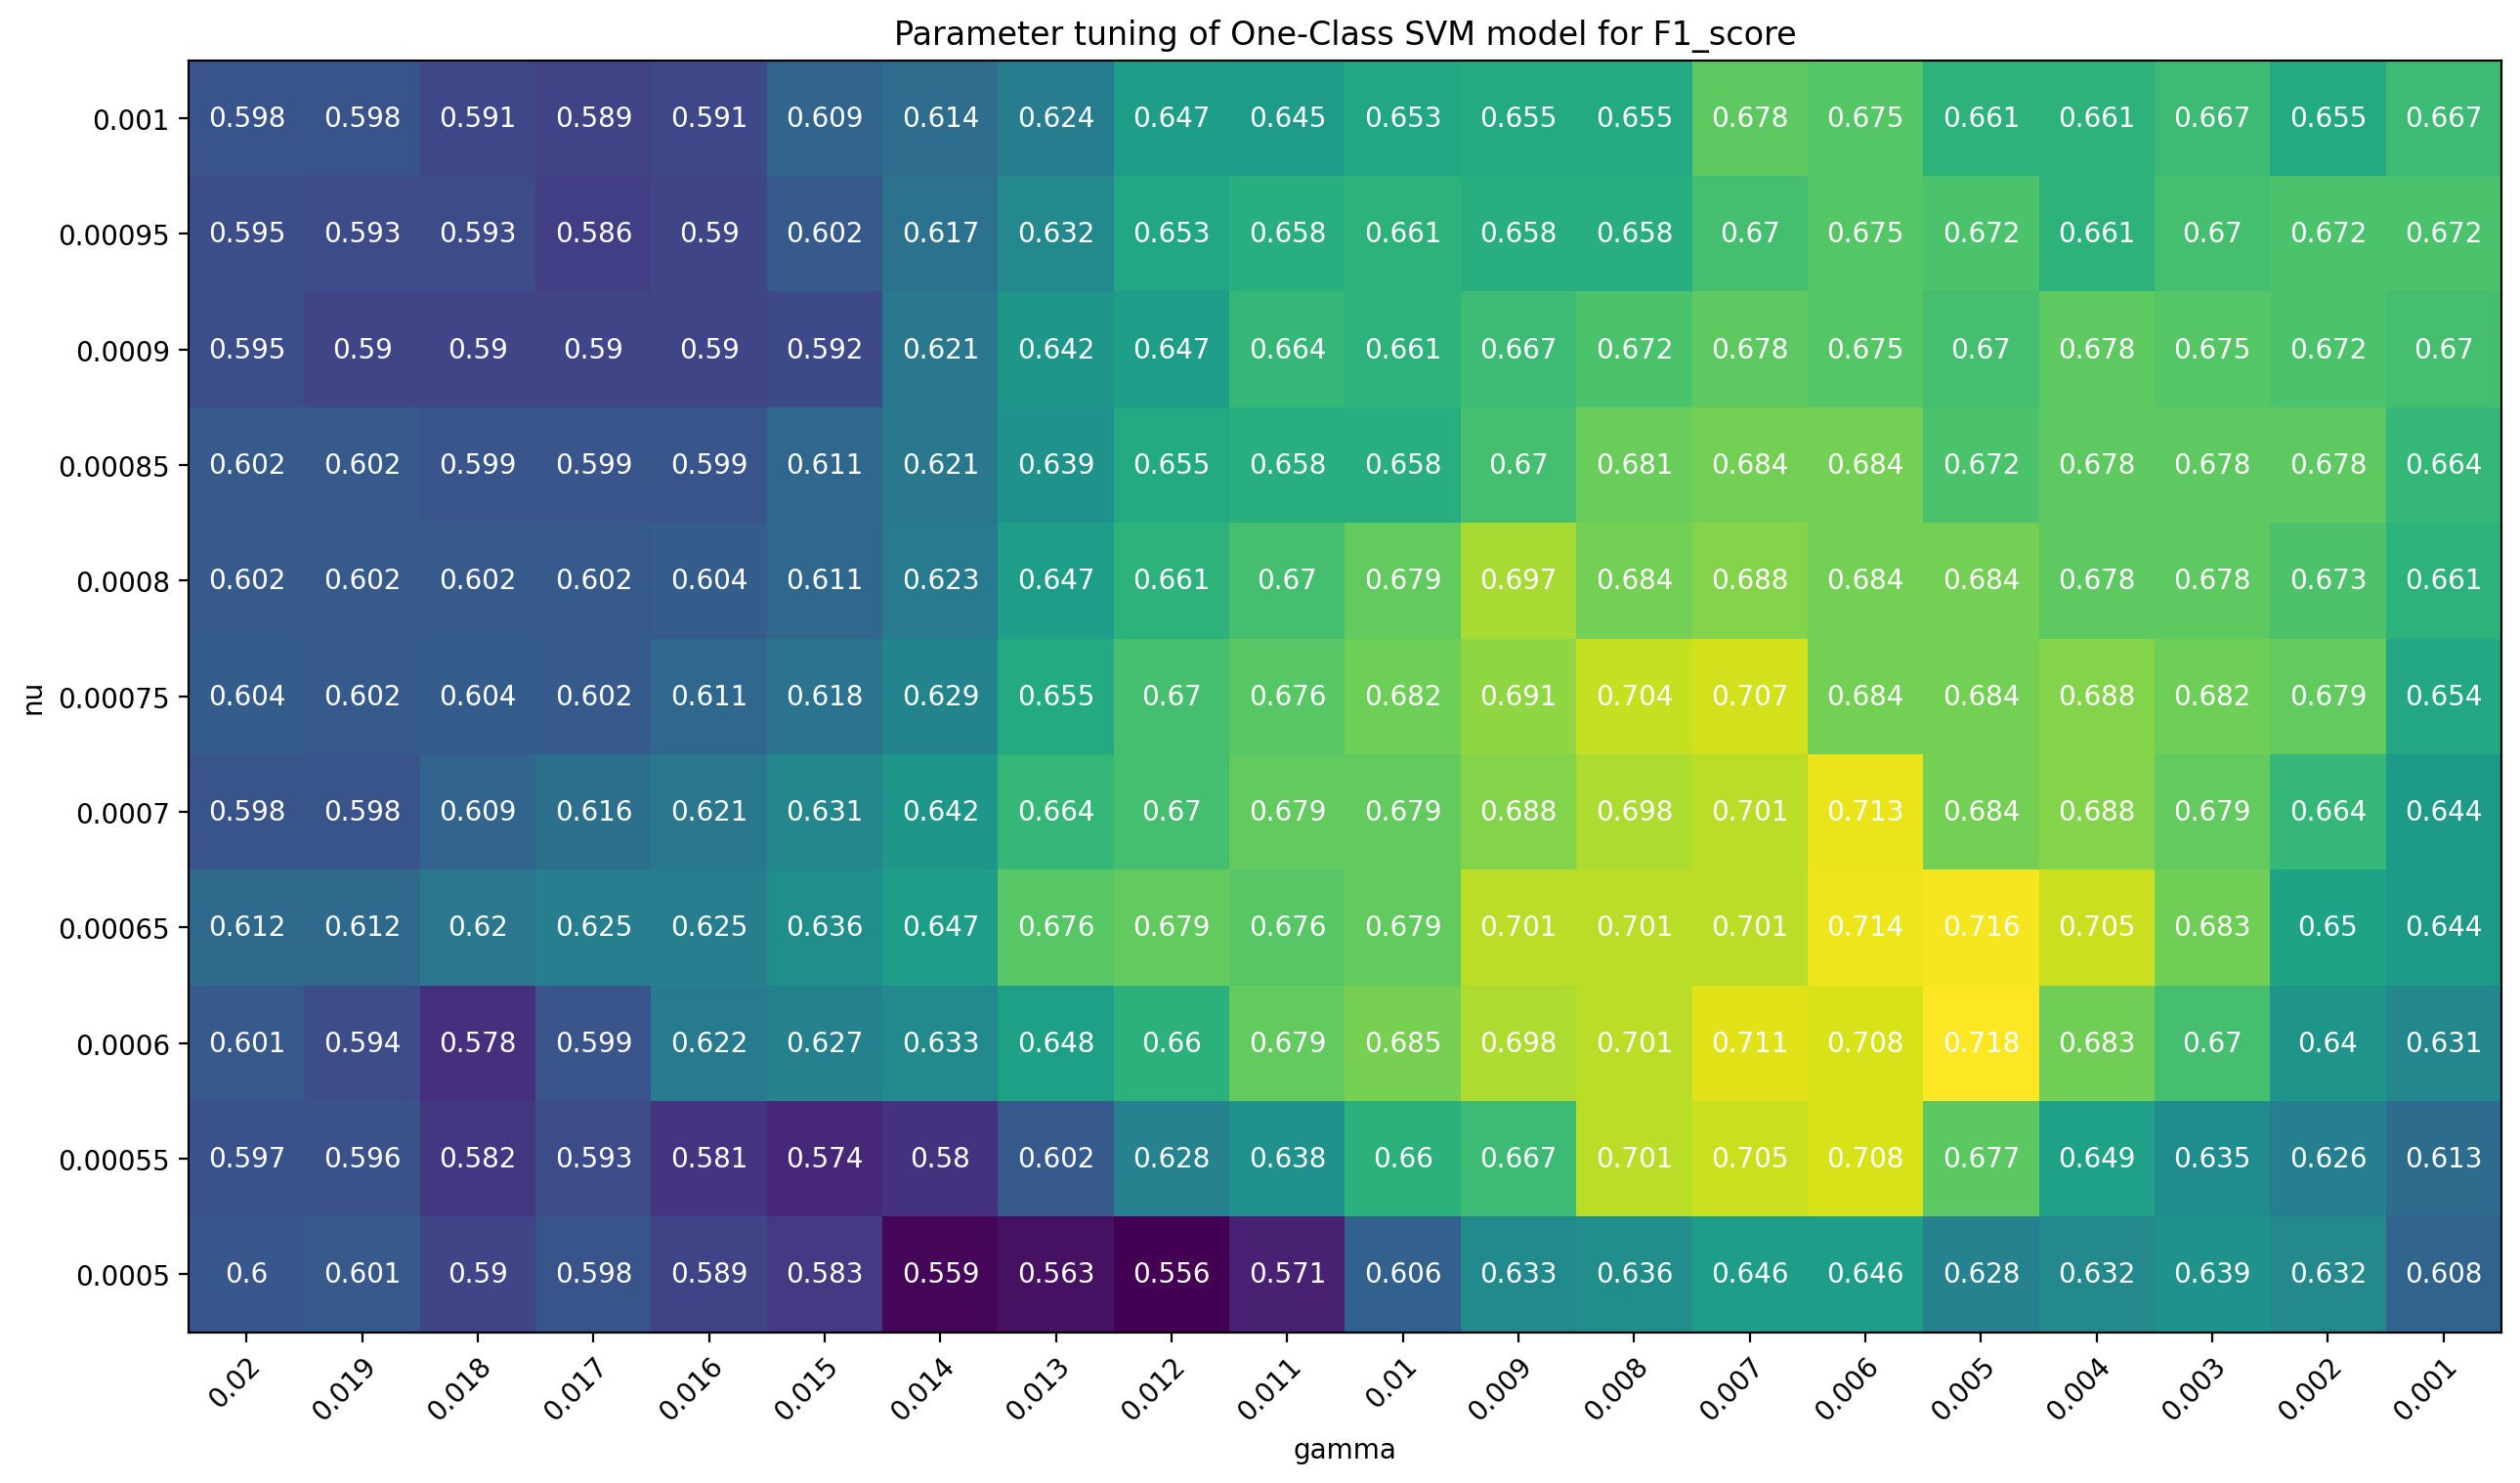

In [49]:
#visualize the tuned parameters
results_df = pd.DataFrame(results)
F1_array = np.round(np.array(results_df['F1']).reshape((11,20)), 3)

fig, ax = plt.subplots( figsize=(13,10), dpi=200)
im = ax.imshow(F1_array)

# We want to show all ticks...
ax.set_xticks(np.arange(len(gamma_params)))
ax.set_yticks(np.arange(len(nu_params)))
# ... and label them with the respective list entries
ax.set_xticklabels(gamma_params)
ax.set_yticklabels(nu_params)

ax.set_xlabel('gamma')
ax.set_ylabel('nu')
                   

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(nu_params)):
    for j in range(len(gamma_params)):
        text = ax.text(j, i, F1_array[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Parameter tuning of One-Class SVM model for F1_score")
fig.tight_layout()
# plt.savefig('img/OCSVM_paramtuning.png')
plt.show()


#### Test the model with the best parameters

In [73]:
#train and test the model
oneclass_svm = OneClassSVM(kernel='rbf', gamma=0.005, nu=0.0006)
oneclass_svm.fit(Xtrain_normal_sample[[ 'V14', 'V17', 'V12']]) 
pred_test_ocsvm = np.where(oneclass_svm.predict(Xtest[[ 'V14', 'V17', 'V12']])==-1, 1, 0)

#report
print(classification_report(ytest, pred_test_ocsvm, digits=3))
disp_conf_matrix(ytest, pred_test_ocsvm)

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     56864
           1      0.711     0.827     0.764        98

    accuracy                          0.999     56962
   macro avg      0.855     0.913     0.882     56962
weighted avg      0.999     0.999     0.999     56962



Pred_0  Pred_1
True_0   56831      33
True_1      17      81